# Comparing the Different Models and Merge them

## Imports

In [1]:
import sys
sys.executable

'/Users/nbai/opt/miniconda3/bin/python'

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
from argparse import Namespace
from collections import Counter
import json
import os
import re
import string

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import torch

from scipy import stats
import seaborn as sns
import torch.nn.functional as F

## Loading Stored Prediction Results

In [4]:
save_dir = 'model_storage/'
compare = ['MLP', 'GAT', 'GCN', 'SAGE', 'HeteroGNN', 'HGT']
sets = ['val', 'test']

In [6]:
preds = {}
for model in compare:
    now_dir = save_dir + model + '/'
    temp_df = pd.read_csv(now_dir+'preds_XL_trans.csv', sep='\t', index_col=0)
    preds[model] = torch.tensor(np.array(temp_df))

In [16]:
metrics = {}
for model in compare:
    now_dir = save_dir + model + '/'
    metrics[model] = {}
    for s in sets:
        temp_df = pd.read_csv(now_dir+'eval_metrics_XL_trans.csv', sep=',', index_col='Unnamed: 0')
        metrics[model]= torch.tensor(np.array(temp_df)[:,1:].astype(float))

In [239]:
metrics_s = {}
for model in compare:
    now_dir = save_dir + model + '/'
    metrics_s[model] = {}
    for s in sets:
        if model == 'GCN':
            temp_df = pd.read_csv(now_dir+'knn_'+s+'_metrics.csv', sep='\t', index_col='Unnamed: 0')
        else:
            temp_df = pd.read_csv(now_dir+s+'_metrics.csv', sep='\t', index_col='Unnamed: 0')
        metrics_s[model][s] = torch.tensor(np.array(temp_df).mean(axis=0))

In [17]:
perclass = {}
for model in compare:
    now_dir = save_dir + model + '/'
    temp_df = pd.read_csv(now_dir+'per_class_metrics_XL_trans.csv', sep=',')
    perclass[model] = torch.tensor(np.array(temp_df[['precision','recall','F1']]))

In [18]:
preds

{'MLP': tensor([[0.5945, 0.0481, 0.0196,  ..., 0.0042, 0.0049, 0.0149],
         [0.3625, 0.0313, 0.0027,  ..., 0.0024, 0.0031, 0.0105],
         [0.0294, 0.3697, 0.0144,  ..., 0.0128, 0.0156, 0.0154],
         ...,
         [0.8306, 0.0353, 0.0033,  ..., 0.0028, 0.0034, 0.0128],
         [0.6720, 0.1646, 0.0121,  ..., 0.0038, 0.0042, 0.0119],
         [0.7227, 0.0778, 0.0054,  ..., 0.0036, 0.0033, 0.0107]],
        dtype=torch.float64),
 'GAT': tensor([[0.6066, 0.0426, 0.0130,  ..., 0.0031, 0.0036, 0.0088],
         [0.2525, 0.0096, 0.0009,  ..., 0.0021, 0.0027, 0.0088],
         [0.0099, 0.1917, 0.0127,  ..., 0.0147, 0.0189, 0.0166],
         ...,
         [0.8326, 0.0460, 0.0020,  ..., 0.0024, 0.0032, 0.0094],
         [0.5872, 0.2187, 0.0123,  ..., 0.0032, 0.0037, 0.0106],
         [0.6800, 0.1108, 0.0062,  ..., 0.0040, 0.0038, 0.0107]],
        dtype=torch.float64),
 'GCN': tensor([[5.5484e-01, 1.7649e-01, 3.5279e-02,  ..., 2.6616e-03, 2.7507e-03,
          6.6863e-03],
         [

In [19]:
perclass

{'MLP': tensor([[0.9870, 0.9655, 0.9761],
         [0.9947, 0.9843, 0.9895],
         [0.8792, 0.9209, 0.8996],
         [0.9466, 0.9617, 0.9541],
         [0.9963, 0.9883, 0.9923],
         [0.9798, 0.9829, 0.9813],
         [0.9907, 0.9261, 0.9573],
         [0.3578, 0.9655, 0.5221],
         [0.7179, 1.0000, 0.8358],
         [0.9926, 0.9552, 0.9735],
         [0.9927, 0.9856, 0.9891],
         [0.9214, 0.9149, 0.9181],
         [0.9338, 0.9724, 0.9527],
         [0.9952, 0.9874, 0.9913],
         [0.9758, 0.9878, 0.9817],
         [0.9920, 0.9315, 0.9608],
         [0.3322, 0.9314, 0.4897],
         [0.7485, 1.0000, 0.8562],
         [0.7706, 0.8479, 0.8074],
         [0.6796, 0.7494, 0.7128],
         [0.6633, 0.7713, 0.7133],
         [0.7332, 0.6835, 0.7075],
         [0.0000, 0.0000, 0.0000],
         [0.9230, 0.8410, 0.8801],
         [0.5000, 0.6667, 0.5714],
         [0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000],
         [0.7778, 0.8750, 0.8235],
         [0.0

In [209]:
pd.read_csv(now_dir+'eval_metrics_XL_trans.csv', sep=',', index_col='Unnamed: 0')

,name,train,val,test
0,val_ATT_loss,1.758587,1.778306,1.780264
1,val_VAL_loss,2.245272,2.243987,2.243471
2,val_ATT_acc,91.356211,95.399798,95.253288
3,val_VAL_acc,77.578010,78.341794,78.917018
4,val_VAL_acc_k,97.951422,98.040045,98.199719
5,val_VAL_jac_k,0.726554,0.724760,0.723887


In [224]:
torch.vstack([metrics_s['MLP'][s] for s in metrics_s['MLP']])

tensor([[ 0.7870,  1.6269, 98.9837, 99.5074,  0.7578, 80.7882],
        [ 0.7921,  1.6385, 98.2107, 99.4792,  0.7413, 80.2083]],
       dtype=torch.float64)

In [245]:
metrics_s

{'MLP': tensor([[ 0.7870,  0.7921],
         [ 1.6269,  1.6385],
         [98.9837, 98.2107],
         [80.7882, 80.2083],
         [99.5074, 99.4792],
         [ 0.7578,  0.7413]], dtype=torch.float64),
 'GAT': tensor([[ 0.8012,  0.8162],
         [ 1.6186,  1.6323],
         [98.0691, 97.3757],
         [80.3941, 82.5521],
         [99.5074, 99.4792],
         [ 0.7632,  0.7611]], dtype=torch.float64),
 'GCN': tensor([[ 0.8504,  0.8427],
         [ 1.6420,  1.6692],
         [91.8699, 93.8370],
         [74.3842, 72.9167],
         [99.5074, 98.4375],
         [ 0.6921,  0.6840]], dtype=torch.float64),
 'SAGE': tensor([[ 0.7920,  0.7927],
         [ 1.6276,  1.6523],
         [95.7114, 97.0775],
         [80.6897, 79.0625],
         [99.9507, 99.4792],
         [ 0.7717,  0.7548]], dtype=torch.float64),
 'HeteroGNN': tensor([[ 0.8145,  0.8263],
         [ 1.6211,  1.6446],
         [96.6260, 95.6461],
         [84.7291, 77.8646],
         [99.1133, 99.1146],
         [ 0.7733,  0.717

In [217]:
metrics

{'MLP': tensor([[ 1.7495,  1.7407,  1.7408],
         [ 2.2504,  2.2484,  2.2477],
         [91.5809, 96.8607, 96.7940],
         [79.1598, 80.5274, 80.5204],
         [98.6689, 98.7028, 98.8608],
         [ 0.7442,  0.7525,  0.7522]], dtype=torch.float64),
 'GAT': tensor([[ 1.7534,  1.7534,  1.7549],
         [ 2.2463,  2.2437,  2.2431],
         [93.3184, 96.2779, 96.0081],
         [80.0415, 80.8799, 80.9001],
         [98.4700, 98.7169, 98.6076],
         [ 0.7409,  0.7350,  0.7344]], dtype=torch.float64),
 'GCN': tensor([[ 1.7745,  1.7432,  1.7443],
         [ 2.2433,  2.2418,  2.2406],
         [85.9279, 91.4135, 91.2380],
         [76.0135, 75.5358, 76.4276],
         [96.8018, 96.6723, 96.5260],
         [ 0.7065,  0.7165,  0.7167]], dtype=torch.float64),
 'SAGE': tensor([[ 1.7566,  1.7398,  1.7407],
         [ 2.2456,  2.2395,  2.2390],
         [90.0856, 94.6927, 94.1016],
         [75.9184, 78.1867, 78.2138],
         [98.4355, 98.6887, 98.3685],
         [ 0.7273,  0.7555, 

## Aggregation Computation

### Change the Shape of the Dataset and Set Sample Size as Batch

In [21]:
all_preds = torch.concat([preds[pred].unsqueeze(dim=0) for pred in preds])

In [22]:
all_preds_i = all_preds.transpose(0,1).transpose(1,2)

### Weights of the model performance defined as sum of top-1 HA accuracy and top-k HV Jaccard

In [35]:
weights = torch.tensor([(metrics[model][2]/100).sum() + metrics[model][5].sum() for model in metrics])
weights

tensor([5.1013, 5.0663, 4.8254, 5.0244, 4.9138, 4.9953], dtype=torch.float64)

In [36]:
all_preds_i.shape

torch.Size([80963, 20, 6])

### Weighted Average of Model Prediction as Final Post Labels

In [37]:
weighted_average = (all_preds_i@weights)/weights.sum()
weighted_average

tensor([[0.5377, 0.0725, 0.0236,  ..., 0.0034, 0.0042, 0.0100],
        [0.2668, 0.0177, 0.0015,  ..., 0.0023, 0.0026, 0.0089],
        [0.0131, 0.2840, 0.0148,  ..., 0.0122, 0.0172, 0.0166],
        ...,
        [0.8277, 0.0444, 0.0026,  ..., 0.0024, 0.0027, 0.0098],
        [0.6084, 0.1964, 0.0128,  ..., 0.0030, 0.0032, 0.0097],
        [0.6989, 0.0833, 0.0056,  ..., 0.0039, 0.0035, 0.0106]],
       dtype=torch.float64)

### Prediction Confidence of top-4 predictions

In [38]:
k_con = weighted_average.topk(4).values.sum(dim=1)/2

In [39]:
pd.Series(k_con).describe()

count    80963.000000
mean         0.638480
std          0.102168
min          0.322416
25%          0.564210
50%          0.640114
75%          0.714964
max          0.913102
dtype: float64

<AxesSubplot: >

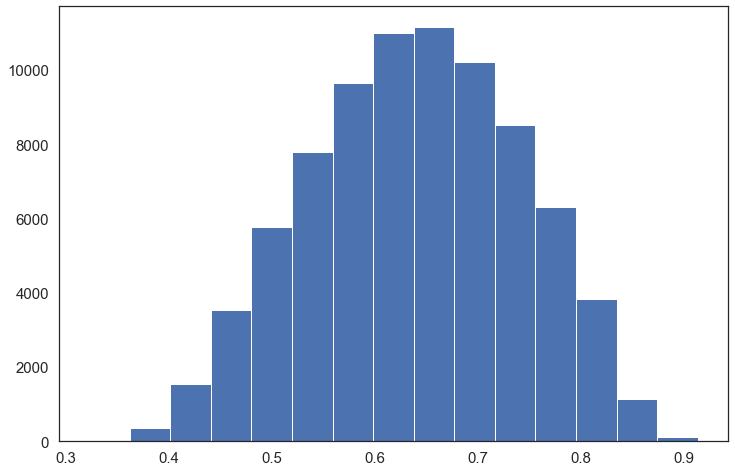

In [40]:
sns.set(style="white")

pd.Series(k_con).hist(bins=15, grid=False, figsize=(12,8), xlabelsize=15, ylabelsize=15)

### Prediction Agreement as Result of SVD

In [41]:
Z = (all_preds_i - all_preds_i.mean(dim=1).unsqueeze(dim=1))/all_preds_i.norm(dim=1).unsqueeze(dim=1)

In [42]:
Z.shape

torch.Size([80963, 20, 6])

In [43]:
k_agr = (torch.linalg.svdvals(Z)[:,0].square()-1)/5

In [44]:
pd.Series(k_agr).describe()

count    80963.000000
mean         0.540757
std          0.148690
min          0.010223
25%          0.438502
50%          0.554917
75%          0.663145
max          0.815450
dtype: float64

<AxesSubplot: >

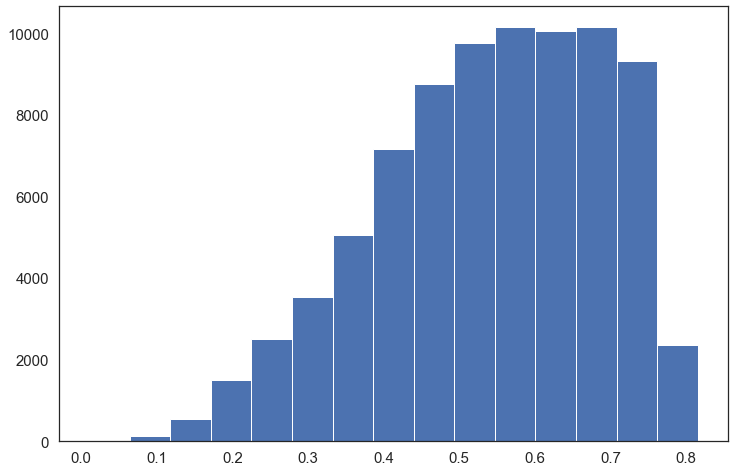

In [45]:
sns.set(style="white")

pd.Series(k_agr).hist(bins=15, grid=False, figsize=(12,8), xlabelsize=15, ylabelsize=15)

### Saving Aggregated Results

In [46]:
results = pd.DataFrame(torch.hstack([weighted_average, k_con.unsqueeze(dim=1), k_agr.unsqueeze(dim=1)])).rename(columns={20:'Confidence',21:'Agreement'})

In [47]:
results

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,Confidence,Agreement
0,0.537724,0.072497,0.023566,0.037800,0.011643,0.239657,0.028061,0.023010,0.026043,0.225410,...,0.402651,0.025080,0.069138,0.005065,0.004105,0.003443,0.004174,0.009989,0.702721,0.553973
1,0.266822,0.017705,0.001483,0.006402,0.002683,0.688358,0.003694,0.002522,0.010332,0.201570,...,0.453113,0.020980,0.083225,0.002840,0.002714,0.002272,0.002595,0.008858,0.804932,0.692497
2,0.013112,0.284023,0.014802,0.012405,0.463999,0.020587,0.113919,0.011397,0.065757,0.083799,...,0.115907,0.028259,0.437207,0.031026,0.016339,0.012229,0.017151,0.016630,0.665210,0.519971
3,0.025554,0.272558,0.031688,0.021360,0.063268,0.132266,0.367078,0.028610,0.057617,0.046096,...,0.219217,0.059767,0.259919,0.019228,0.011341,0.013703,0.013224,0.015740,0.559387,0.383159
4,0.006616,0.909048,0.006113,0.002524,0.002362,0.051826,0.009289,0.002223,0.009999,0.026473,...,0.446571,0.101382,0.090424,0.006236,0.003555,0.005438,0.006320,0.010417,0.829402,0.775994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80958,0.063393,0.252998,0.011522,0.012524,0.011825,0.514142,0.037315,0.009290,0.086992,0.111516,...,0.300699,0.015232,0.102113,0.003600,0.003777,0.003618,0.003685,0.010313,0.679981,0.555320
80959,0.930688,0.015330,0.001392,0.025953,0.006745,0.007861,0.005936,0.004718,0.001378,0.222278,...,0.179819,0.008915,0.087776,0.002579,0.003693,0.002650,0.002715,0.009001,0.816770,0.771911
80960,0.827661,0.044392,0.002604,0.045729,0.007355,0.048676,0.011862,0.008082,0.003639,0.287133,...,0.151470,0.005977,0.154269,0.003332,0.003863,0.002434,0.002748,0.009790,0.746888,0.724135
80961,0.608399,0.196407,0.012783,0.039235,0.010137,0.027618,0.078385,0.021311,0.005724,0.168558,...,0.183493,0.010497,0.132461,0.003136,0.003483,0.003042,0.003166,0.009745,0.644930,0.592894


In [48]:
results.to_csv(save_dir + 'General_Results/preds_XL.csv',sep='\t')

In [6]:
results = pd.read_csv(save_dir + 'General_Results/preds_XL.csv',sep='\t', index_col = 'Unnamed: 0')

In [348]:
results_L = pd.read_csv(save_dir + 'General_Results/preds.csv',sep='\t', index_col = 'Unnamed: 0')

In [349]:
results_L

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,Confidence,Agreement,Split
0,0.023308,0.092600,0.013124,0.008048,0.196725,0.106169,0.049425,0.006630,0.503971,0.073991,...,0.016723,0.110538,0.003947,0.002881,0.003196,0.003373,0.008975,0.640173,0.511985,3
1,0.007802,0.028861,0.005184,0.002837,0.035748,0.039839,0.007949,0.002255,0.869525,0.137170,...,0.012703,0.096044,0.004870,0.003663,0.003719,0.004303,0.009441,0.804773,0.758477,1
2,0.046474,0.078024,0.019920,0.013998,0.189559,0.294794,0.076289,0.013048,0.267894,0.152243,...,0.011432,0.131497,0.004096,0.003283,0.002871,0.003469,0.009972,0.541068,0.398835,3
3,0.039600,0.167872,0.037128,0.013169,0.010623,0.062525,0.611162,0.047346,0.010575,0.056670,...,0.021234,0.621870,0.009843,0.006424,0.004495,0.007312,0.009619,0.779347,0.699834,2
4,0.224977,0.389542,0.008062,0.058410,0.010918,0.248220,0.037936,0.010347,0.011587,0.188741,...,0.013952,0.359828,0.005026,0.003659,0.002521,0.003093,0.009433,0.613210,0.462161,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,0.021323,0.395644,0.141878,0.023077,0.005902,0.021139,0.320682,0.055967,0.014388,0.322753,...,0.018147,0.045551,0.005918,0.004739,0.004198,0.006988,0.011462,0.636219,0.484799,2
2947,0.007031,0.036870,0.279541,0.015145,0.003105,0.003098,0.569580,0.080729,0.004902,0.295648,...,0.017517,0.058423,0.005918,0.004885,0.004262,0.007980,0.011796,0.699740,0.596711,3
2948,0.066964,0.518670,0.059821,0.024642,0.014110,0.028481,0.230130,0.045167,0.012014,0.307637,...,0.021037,0.036960,0.006333,0.005501,0.004894,0.008167,0.011490,0.641245,0.524926,3
2949,0.292696,0.283671,0.057701,0.035209,0.014874,0.188822,0.078696,0.034312,0.014019,0.368661,...,0.013481,0.041714,0.004622,0.004239,0.003453,0.005919,0.012276,0.569789,0.437757,2


In [7]:
results

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,Confidence,Agreement,Split
0,0.537724,0.072497,0.023566,0.037800,0.011643,0.239657,0.028061,0.023010,0.026043,0.225410,...,0.025080,0.069138,0.005065,0.004105,0.003443,0.004174,0.009989,0.702721,0.553973,2
1,0.266822,0.017705,0.001483,0.006402,0.002683,0.688358,0.003694,0.002522,0.010332,0.201570,...,0.020980,0.083225,0.002840,0.002714,0.002272,0.002595,0.008858,0.804932,0.692497,2
2,0.013112,0.284023,0.014802,0.012405,0.463999,0.020587,0.113919,0.011397,0.065757,0.083799,...,0.028259,0.437207,0.031026,0.016339,0.012229,0.017151,0.016630,0.665210,0.519971,0
3,0.025554,0.272558,0.031688,0.021360,0.063268,0.132266,0.367078,0.028610,0.057617,0.046096,...,0.059767,0.259919,0.019228,0.011341,0.013703,0.013224,0.015740,0.559387,0.383159,0
4,0.006616,0.909048,0.006113,0.002524,0.002362,0.051826,0.009289,0.002223,0.009999,0.026473,...,0.101382,0.090424,0.006236,0.003555,0.005438,0.006320,0.010417,0.829402,0.775994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80958,0.063393,0.252998,0.011522,0.012524,0.011825,0.514142,0.037315,0.009290,0.086992,0.111516,...,0.015232,0.102113,0.003600,0.003777,0.003618,0.003685,0.010313,0.679981,0.555320,3
80959,0.930688,0.015330,0.001392,0.025953,0.006745,0.007861,0.005936,0.004718,0.001378,0.222278,...,0.008915,0.087776,0.002579,0.003693,0.002650,0.002715,0.009001,0.816770,0.771911,3
80960,0.827661,0.044392,0.002604,0.045729,0.007355,0.048676,0.011862,0.008082,0.003639,0.287133,...,0.005977,0.154269,0.003332,0.003863,0.002434,0.002748,0.009790,0.746888,0.724135,2
80961,0.608399,0.196407,0.012783,0.039235,0.010137,0.027618,0.078385,0.021311,0.005724,0.168558,...,0.010497,0.132461,0.003136,0.003483,0.003042,0.003166,0.009745,0.644930,0.592894,0


### Evaluating The Aggregated Results

In [8]:
def compute_cross_entropy(y_pred, y_target):
    y_target = y_target.cpu().float()
    y_pred = y_pred.cpu().float()
    criterion = nn.BCEWithLogitsLoss()
    return criterion(y_target, y_pred)

def compute_1_accuracy(y_pred, y_target):
    y_target_indices = y_target.max(dim=1)[1]
    y_pred_indices = y_pred.max(dim=1)[1]
    n_correct = torch.eq(y_pred_indices, y_target_indices).sum().item()
    return n_correct / len(y_pred_indices) * 100

def compute_k_accuracy(y_pred, y_target, k=3):
    y_pred_indices = y_pred.topk(k, dim=1)[1]
    y_target_indices = y_target.max(dim=1)[1]
    n_correct = torch.tensor([y_pred_indices[i] in y_target_indices[i] for i in range(len(y_pred))]).sum().item()
    return n_correct / len(y_pred_indices) * 100

def compute_k_jaccard_index(y_pred, y_target, k=3):
    y_target_indices = y_target.topk(k, dim=1)[1]
    y_pred_indices = y_pred.max(dim=1)[1]
    jaccard = torch.tensor([len(np.intersect1d(y_target_indices[i], y_pred_indices[i]))/
                            len(np.union1d(y_target_indices[i], y_pred_indices[i]))
                            for i in range(len(y_pred))]).sum().item()
    return jaccard / len(y_pred_indices)

def compute_jaccard_index(y_pred, y_target, k=3, multilabel=False):
    
    threshold = 1.0/(k+1)
    threshold_2 = 0.5
    
    if multilabel:
        y_pred_indices = y_pred.gt(threshold_2)
    else:
        y_pred_indices = y_pred.gt(threshold)
    
    y_target_indices = y_target.gt(threshold)
        
    jaccard = ((y_target_indices*y_pred_indices).sum(axis=1)/((y_target_indices+y_pred_indices).sum(axis=1)+1e-8)).sum().item()
    return jaccard / len(y_pred_indices)

In [9]:
y_s = np.load('dataset/Venice_XL_homo/raw/labels.npz', allow_pickle=True)
y_att = torch.tensor(y_s['ATT_LAB'][:,1:10].astype(float))
y_val = torch.tensor(np.nan_to_num(y_s['VAL_LAB'][:,2:13].astype(float)))
ys = torch.tensor(np.hstack([y_att, y_val]))
bool_att_lab = torch.tensor(y_s['ATT_LAB'][:,-1].astype(bool))
bool_val_lab = torch.tensor(y_s['VAL_LAB'][:,-1].astype(bool))

In [13]:
split = np.load('dataset/Venice_XL_homo/raw/train_val_test_idx.npz')
split_masks = {}
for name in ['train', 'val', 'test']:
    idx = split[f'{name}_idx']
    idx = torch.from_numpy(idx).to(torch.long)
    mask = torch.zeros(ys.shape[0], dtype=torch.bool)
    mask[idx] = True
    split_masks[name] = mask

In [18]:
out = torch.tensor(np.array(results)[:,:-3])
out_att = out[:,:9]
out_val = out[:,9:]
att_node = (bool_att_lab).nonzero().squeeze()
val_node = (bool_val_lab).nonzero().squeeze()

In [59]:
batch_size = ys.shape[0]

In [60]:
(split_masks['val'] * bool_att_lab).sum()

tensor(12869)

In [61]:
(split_masks['val'] * bool_val_lab).sum()

tensor(7092)

In [62]:
(split_masks['test'] * bool_att_lab).sum()

tensor(12851)

In [63]:
(split_masks['test'] * bool_val_lab).sum()

tensor(7110)

In [64]:
acc_1_t = compute_1_accuracy(y_att[:batch_size][split_masks['val'] * bool_att_lab], out_att[split_masks['val'] * bool_att_lab])

In [65]:
import torch.nn.functional as F
acc_1_val = compute_1_accuracy(y_val[split_masks['val'] * bool_val_lab], out_val[split_masks['val'] * bool_val_lab])
acc_k_t = compute_k_accuracy(y_val[split_masks['val'] * bool_val_lab], out_val[split_masks['val'] * bool_val_lab], 3)
jac_k_t = compute_jaccard_index(y_val[split_masks['val'] * bool_val_lab], out_val[split_masks['val'] * bool_val_lab], 3)

In [66]:
(acc_1_t, acc_1_val, acc_k_t, jac_k_t)

(96.5420778615277, 81.48618161308517, 98.77326565143824, 0.7657336446436125)

In [67]:
acc_1_t = compute_1_accuracy(y_att[:batch_size][split_masks['test'] * bool_att_lab], out_att[split_masks['test'] * bool_att_lab])

In [68]:
import torch.nn.functional as F
acc_1_val = compute_1_accuracy(y_val[split_masks['test'] * bool_val_lab], out_val[split_masks['test'] * bool_val_lab])
acc_k_t = compute_k_accuracy(y_val[split_masks['test'] * bool_val_lab], out_val[split_masks['test'] * bool_val_lab], 3)
jac_k_t = compute_jaccard_index(y_val[split_masks['test'] * bool_val_lab], out_val[split_masks['test'] * bool_val_lab], 3)

In [69]:
(acc_1_t, acc_1_val, acc_k_t, jac_k_t)

(96.10925219827251, 81.81434599156118, 98.83263009845288, 0.764510125483474)

In [70]:
acc_1_t = compute_1_accuracy(y_att[:batch_size][split_masks['train'] * bool_att_lab], out_att[split_masks['train'] * bool_att_lab])

In [71]:
import torch.nn.functional as F
acc_1_val = compute_1_accuracy(y_val[split_masks['train'] * bool_val_lab], out_val[split_masks['train'] * bool_val_lab])
acc_k_t = compute_k_accuracy(y_val[split_masks['train'] * bool_val_lab], out_val[split_masks['train'] * bool_val_lab], 3)
jac_k_t = compute_jaccard_index(y_val[split_masks['train'] * bool_val_lab], out_val[split_masks['train'] * bool_val_lab], 3)

In [72]:
(acc_1_t, acc_1_val, acc_k_t, jac_k_t)

(91.61552424582938, 80.54282997666176, 98.66885642665744, 0.7592776391920217)

## Drop in Performance

In [244]:
metrics_s = {key: (torch.vstack([metrics_s[key][s] for s in metrics_s[key]]).T)[[0,1,2,5,3,4]] for key in metrics_s}

In [286]:
metrics_s

{'MLP': tensor([[ 0.7870,  0.7921],
         [ 1.6269,  1.6385],
         [98.9837, 98.2107],
         [80.7882, 80.2083],
         [99.5074, 99.4792],
         [ 0.7578,  0.7413]], dtype=torch.float64),
 'GAT': tensor([[ 0.8012,  0.8162],
         [ 1.6186,  1.6323],
         [98.0691, 97.3757],
         [80.3941, 82.5521],
         [99.5074, 99.4792],
         [ 0.7632,  0.7611]], dtype=torch.float64),
 'GCN': tensor([[ 0.8504,  0.8427],
         [ 1.6420,  1.6692],
         [91.8699, 93.8370],
         [74.3842, 72.9167],
         [99.5074, 98.4375],
         [ 0.6921,  0.6840]], dtype=torch.float64),
 'SAGE': tensor([[ 0.7920,  0.7927],
         [ 1.6276,  1.6523],
         [95.7114, 97.0775],
         [80.6897, 79.0625],
         [99.9507, 99.4792],
         [ 0.7717,  0.7548]], dtype=torch.float64),
 'HeteroGNN': tensor([[ 0.8145,  0.8263],
         [ 1.6211,  1.6446],
         [96.6260, 95.6461],
         [84.7291, 77.8646],
         [99.1133, 99.1146],
         [ 0.7733,  0.717

In [248]:
diff_metrics = {key:(metrics_s[key]-metrics[key][:,1:])[2:] for key in metrics}

In [264]:
diff_metrics_v = torch.vstack([diff_metrics[key]*torch.tensor([1,1,1,100]).unsqueeze(1) for key in diff_metrics])
diff_metrics_df = pd.DataFrame(torch.hstack([diff_metrics_v[:,i] for i in range(2)]))

In [265]:
diff_metrics_df

,0
0,2.123067
1,0.260823
2,0.804625
3,0.533211
4,1.791229
5,-0.485776
6,0.790525
7,2.818829
8,0.456444
9,-1.151579


In [299]:
m_1 = {key:(metrics_s[key])[2:] for key in metrics}
m_2 = {key:(metrics[key][:,1:])[2:] for key in metrics}
m1_v = torch.vstack([m_1[key]*torch.tensor([1,1,1,100]).unsqueeze(1) for key in m_1])
m2_v = torch.vstack([m_2[key]*torch.tensor([1,1,1,100]).unsqueeze(1) for key in m_2])
m1_df = pd.DataFrame(torch.hstack([m1_v[:,i] for i in range(2)]))
m1_df[1] = pd.DataFrame(torch.hstack([m2_v[:,i] for i in range(2)]))

In [300]:
m1_df

,0,1
0,98.983740,96.860673
1,80.788177,80.527355
2,99.507389,98.702764
3,75.779968,75.246757
4,98.069106,96.277877
5,80.394089,80.879865
6,99.507389,98.716864
7,76.321839,73.503010
8,91.869919,91.413474
9,74.384236,75.535815


In [296]:
pd.DataFrame([a,b]).T

,0,1
0,84.23,81.49
1,81.77,81.81
2,99.01,98.77
3,100.00,98.83
4,76.77,76.57
5,76.30,76.45
6,97.56,96.54
7,98.21,96.11


In [301]:
m_df = pd.concat([m1_df, pd.DataFrame([a,b]).T]).reset_index().drop('index',axis=1)

In [268]:
a = np.array([84.23,81.77,99.01,100,76.77,76.3,97.56,98.21])
a

array([ 84.23,  81.77,  99.01, 100.  ,  76.77,  76.3 ,  97.56,  98.21])

In [270]:
b = np.array([81.49, 81.81, 98.77, 98.83, 76.57, 76.45, 96.54, 96.11])
b

array([81.49, 81.81, 98.77, 98.83, 76.57, 76.45, 96.54, 96.11])

In [271]:
pd.Series(a-b)

0    2.74
1   -0.04
2    0.24
3    1.17
4    0.20
5   -0.15
6    1.02
7    2.10
dtype: float64

In [280]:
diff_df = pd.concat([diff_metrics_df,pd.Series(a-b)]).reset_index().drop('index',axis=1)

In [302]:
m_df

,0,1
0,98.983740,96.860673
1,80.788177,80.527355
2,99.507389,98.702764
3,75.779968,75.246757
4,98.069106,96.277877
5,80.394089,80.879865
6,99.507389,98.716864
7,76.321839,73.503010
8,91.869919,91.413474
9,74.384236,75.535815


In [282]:
from pingouin import ttest

In [306]:
m_df.describe()

,0,1
count,56.000000,56.000000
mean,87.549766,86.518885
std,10.959608,10.619628
min,68.402779,69.845281
25%,77.068116,76.444392
50%,88.299491,86.524018
75%,98.267427,96.702736
max,100.000000,98.860759


In [309]:
ttest(m_df[0],m_df[1], paired=True, alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.516504,55,greater,0.000017,"[0.65, inf]",0.095532,1209.139,0.173935


### Per-Class Metrics

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
def top_k_confusion_matrix(y, y_pred, k=3):
    dim = y.shape[-1]
    y = y.topk(k=k, axis=1)[1]
    y_pred = y_pred.topk(k=k, axis=1)[1]
    conf = np.zeros((dim, dim))
    for i in range(k):
        for j in range(k):
            conf = np.add(conf, confusion_matrix(y[:,i], y_pred[:,j], labels = range(dim)))
    return conf

In [20]:
test_ATT_conf = confusion_matrix(ys[split_masks['test'] * bool_att_lab][:,:9].argmax(axis=1).cpu(), 
                                 out[split_masks['test'] * bool_att_lab][:,:9].argmax(axis=1).cpu(), labels = range(9))
test_VAL_conf = confusion_matrix(ys[split_masks['test'] * bool_val_lab][:,9:].argmax(axis=1).cpu(), 
                                 out[split_masks['test'] * bool_val_lab][:,9:].argmax(axis=1).cpu(), labels=range(11))
test_VAL_conf_k = (top_k_confusion_matrix(ys[split_masks['test'] * bool_val_lab][:,9:].cpu(),  
                                out[split_masks['test'] * bool_val_lab][:,9:].cpu(),3)).astype(int)

In [21]:
test_ATT_conf

array([[1360,    6,    0,    7,    0,   16,    0,    0,    0],
       [   0, 3200,    0,    0,    0,    5,    6,    0,    0],
       [   0,    0,  245,    0,    0,    0,   20,    0,    0],
       [  33,    6,    0,  585,    0,    0,   12,    1,    0],
       [   6,    9,    0,    1, 2679,    0,    9,    0,    0],
       [   1,   15,    0,    1,    4, 1560,    2,    0,    0],
       [   1,   23,    0,    0,    3,    0, 2566,    0,    0],
       [  16,    3,   59,   19,    0,    0,  179,   37,    0],
       [   0,   11,    0,    0,   11,   15,    0,    0,  119]],
      dtype=int64)

In [22]:
test_VAL_conf

array([[ 596,    8,   22,    8,    0,   46,    0,    0,    0,    0,    0],
       [  48,  515,   91,   50,    0,  145,    0,    0,    0,    0,    0],
       [  43,   41, 1116,   43,    0,  364,    0,    0,    0,    0,    0],
       [  34,   12,   45,  360,    0,   85,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  29,   19,  128,   16,    0, 3223,    0,    0,    0,    0,    0],
       [   2,    0,    1,    0,    0,    5,    1,    0,    0,    3,    0],
       [   0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0,    1,    1,    0,    0,    6,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

In [23]:
test_VAL_conf_k

array([[1396,  691, 1244,  744,    0,  878,    0,    0,    0,    0,    0],
       [ 899, 1480, 2350, 1779,    2, 1698,    0,    0,    0,    0,    0],
       [ 972, 1108, 5881, 4909,    3, 5211,    0,    0,    0,    0,    0],
       [ 853, 1075, 4850, 4733,    3, 4290,    0,    0,    0,    0,    0],
       [   0,    7,   18,   18,    1,   10,    0,    0,    0,    0,    0],
       [ 820,  595, 5370, 4559,    0, 5326,    1,    0,    0,    0,    0],
       [  11,    0,   29,   10,    0,   20,   13,    0,    0,   13,    0],
       [   3,    0,    5,    1,    0,    5,    4,    0,    0,    3,    0],
       [   2,    0,   14,    2,    0,    5,    9,    0,    0,   10,    0],
       [   3,    0,   18,    3,    0,    8,   12,    0,    0,   13,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [24]:
val_ATT_conf = confusion_matrix(ys[split_masks['val'] * bool_att_lab][:,:9].argmax(axis=1).cpu(), 
                                 out[split_masks['val'] * bool_att_lab][:,:9].argmax(axis=1).cpu(), labels = range(9))
val_VAL_conf = confusion_matrix(ys[split_masks['val'] * bool_val_lab][:,9:].argmax(axis=1).cpu(), 
                                 out[split_masks['val'] * bool_val_lab][:,9:].argmax(axis=1).cpu(), labels=range(11))
val_VAL_conf_k = (top_k_confusion_matrix(ys[split_masks['val'] * bool_val_lab][:,9:].cpu(),  
                                out[split_masks['val'] * bool_val_lab][:,9:].cpu(),3)).astype(int)

In [25]:
val_ATT_conf

array([[1333,    0,    0,    4,    1,   12,    2,    0,    0],
       [   2, 3285,    0,    0,    0,    4,    8,    0,    0],
       [   0,    0,  266,    0,    0,    0,   13,    1,    0],
       [  34,    6,    0,  629,    0,    1,    9,    1,    0],
       [   1,   11,    0,    0, 2668,    0,    6,    1,    0],
       [   3,   19,    0,    1,    2, 1462,    1,    0,    0],
       [   1,   20,    1,    0,    2,    0, 2606,    0,    0],
       [  14,    2,   47,   10,    0,    0,  166,   47,    0],
       [   1,   13,    0,    0,   14,   10,    1,    0,  128]],
      dtype=int64)

In [26]:
val_VAL_conf

array([[ 582,   17,   16,   11,    0,   41,    0,    0,    0,    0,    0],
       [  59,  492,   91,   66,    0,  121,    0,    0,    0,    0,    0],
       [  42,   23, 1149,   52,    0,  377,    0,    0,    0,    1,    0],
       [  40,   11,   57,  403,    0,   87,    0,    0,    0,    0,    0],
       [   0,    0,    1,    3,    0,    0,    0,    0,    0,    0,    0],
       [  24,   21,  126,   14,    0, 3148,    0,    0,    0,    0,    0],
       [   1,    0,    2,    0,    0,    2,    0,    0,    0,    0,    0],
       [   1,    0,    1,    0,    0,    1,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0,    1,    1,    0,    0,    5,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

In [27]:
val_VAL_conf_k

array([[1417,  687, 1237,  784,    0,  891,    0,    0,    0,    0,    0],
       [ 968, 1483, 2430, 1873,    4, 1777,    0,    0,    0,    0,    0],
       [ 989, 1123, 5842, 4852,    4, 5157,    2,    0,    0,    1,    0],
       [ 848, 1112, 4738, 4664,    6, 4199,    0,    0,    0,    0,    0],
       [   0,    8,   21,   22,    4,   11,    0,    0,    0,    0,    0],
       [ 809,  591, 5275, 4520,    0, 5248,    2,    0,    0,    1,    0],
       [  13,    0,   35,   18,    2,   34,   10,    0,    0,    8,    0],
       [   1,    0,    3,    1,    0,    3,    0,    0,    0,    1,    0],
       [   3,    0,   13,    2,    1,   11,    9,    0,    0,    9,    0],
       [   4,    0,   14,    1,    0,   12,   10,    0,    0,   10,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [28]:
train_ATT_conf = confusion_matrix(ys[split_masks['train'] * bool_att_lab][:,:9].argmax(axis=1).cpu(), 
                                 out[split_masks['train'] * bool_att_lab][:,:9].argmax(axis=1).cpu(), labels = range(9))
train_VAL_conf = confusion_matrix(ys[split_masks['train'] * bool_val_lab][:,9:].argmax(axis=1).cpu(), 
                                 out[split_masks['train'] * bool_val_lab][:,9:].argmax(axis=1).cpu(), labels=range(11))
train_VAL_conf_k = (top_k_confusion_matrix(ys[split_masks['train'] * bool_val_lab][:,9:].cpu(),  
                                out[split_masks['train'] * bool_val_lab][:,9:].cpu(),3)).astype(int)

In [29]:
train_ATT_conf

array([[1466,    9,    0,    2,    0,   20,    4,    0,    0],
       [   0, 2630,    0,    0,    0,    3,    3,    0,    0],
       [   1,    2,  116,    0,    0,    0,   20,    0,    0],
       [  38,   16,    0,  407,    0,    0,   18,    1,    0],
       [   3,   14,    0,    0, 2013,    0,   19,    2,    0],
       [   2,   34,    0,    0,    3, 1468,    0,    0,    0],
       [   1,   45,    1,    2,    3,    0, 2404,    1,    0],
       [  35,   11,   18,   21,    0,    0,  579,   21,    0],
       [   0,   13,    0,    0,   12,   14,    0,    0,   74]],
      dtype=int64)

In [30]:
train_VAL_conf

array([[ 868,   26,   31,    8,    0,   79,    0,    0,    0,    0,    0],
       [  71,  790,  185,  102,    0,  230,    0,    0,    0,    0,    0],
       [  57,   57, 1926,   57,    0,  718,    0,    0,    0,    0,    0],
       [  43,   29,   86,  763,    0,  122,    0,    0,    0,    0,    0],
       [   0,    0,    0,    1,    0,    1,    0,    0,    0,    0,    0],
       [  49,   15,  219,   42,    0, 4958,    0,    0,    0,    0,    0],
       [   3,    0,    1,    0,    0,    9,    5,    0,    0,    3,    0],
       [   1,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0,    1,    2,    0,    0,    8,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

In [31]:
train_VAL_conf_k

array([[2066,  985, 1792, 1153,    0, 1392,    1,    0,    0,    0,    0],
       [1311, 2431, 4078, 3267,    0, 3025,    0,    0,    0,    0,    0],
       [1441, 1897, 9647, 8040,    4, 8563,    0,    0,    0,    0,    0],
       [1298, 1830, 7894, 7725,    4, 6983,    0,    0,    0,    0,    0],
       [   0,   22,   54,   54,    4,   28,    0,    0,    0,    0,    0],
       [1245,  982, 8587, 7356,    0, 8592,    1,    0,    0,    0,    0],
       [  20,    1,   52,   17,    0,   39,   26,    0,    0,   19,    0],
       [   9,    0,   14,    3,    0,   12,   11,    0,    0,    5,    0],
       [   2,    0,   18,    1,    0,    6,   16,    0,    0,   14,    0],
       [   6,    0,   24,    2,    0,   10,   23,    0,    0,   19,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [32]:
ATT_conf = train_ATT_conf + val_ATT_conf + test_ATT_conf
VAL_conf = train_VAL_conf + val_VAL_conf + test_VAL_conf
VAL_conf_k = train_VAL_conf_k + val_VAL_conf_k + test_VAL_conf_k

In [33]:
ATT_conf

array([[4159,   15,    0,   13,    1,   48,    6,    0,    0],
       [   2, 9115,    0,    0,    0,   12,   17,    0,    0],
       [   1,    2,  627,    0,    0,    0,   53,    1,    0],
       [ 105,   28,    0, 1621,    0,    1,   39,    3,    0],
       [  10,   34,    0,    1, 7360,    0,   34,    3,    0],
       [   6,   68,    0,    2,    9, 4490,    3,    0,    0],
       [   3,   88,    2,    2,    8,    0, 7576,    1,    0],
       [  65,   16,  124,   50,    0,    0,  924,  105,    0],
       [   1,   37,    0,    0,   37,   39,    1,    0,  321]],
      dtype=int64)

In [34]:
VAL_conf

array([[ 2046,    51,    69,    27,     0,   166,     0,     0,     0,
            0,     0],
       [  178,  1797,   367,   218,     0,   496,     0,     0,     0,
            0,     0],
       [  142,   121,  4191,   152,     0,  1459,     0,     0,     0,
            1,     0],
       [  117,    52,   188,  1526,     0,   294,     0,     0,     0,
            0,     0],
       [    0,     0,     1,     4,     0,     1,     0,     0,     0,
            0,     0],
       [  102,    55,   473,    72,     0, 11329,     0,     0,     0,
            0,     0],
       [    6,     0,     4,     0,     0,    16,     6,     0,     0,
            6,     0],
       [    2,     0,     3,     0,     0,     1,     0,     0,     0,
            0,     0],
       [    0,     0,     2,     0,     0,     0,     1,     0,     0,
            0,     0],
       [    0,     0,     3,     0,     0,     3,     4,     0,     0,
           19,     0],
       [    0,     0,     0,     0,     0,     0,     0,    

In [35]:
VAL_conf_k

array([[ 4879,  2363,  4273,  2681,     0,  3161,     1,     0,     0,
            0,     0],
       [ 3178,  5394,  8858,  6919,     6,  6500,     0,     0,     0,
            0,     0],
       [ 3402,  4128, 21370, 17801,    11, 18931,     2,     0,     0,
            1,     0],
       [ 2999,  4017, 17482, 17122,    13, 15472,     0,     0,     0,
            0,     0],
       [    0,    37,    93,    94,     9,    49,     0,     0,     0,
            0,     0],
       [ 2874,  2168, 19232, 16435,     0, 19166,     4,     0,     0,
            1,     0],
       [   44,     1,   116,    45,     2,    93,    49,     0,     0,
           40,     0],
       [   13,     0,    22,     5,     0,    20,    15,     0,     0,
            9,     0],
       [    7,     0,    45,     5,     1,    22,    34,     0,     0,
           33,     0],
       [   13,     0,    56,     6,     0,    30,    45,     0,     0,
           42,     0],
       [    0,     0,     0,     0,     0,     0,     0,    

In [89]:
pd.concat([pd.DataFrame(val_ATT_conf),pd.DataFrame(test_ATT_conf),pd.DataFrame(train_ATT_conf)],axis=1).to_csv(save_dir + 'General_Results/confusion_matrix_ATT_XL.csv')
pd.concat([pd.DataFrame(val_VAL_conf),pd.DataFrame(test_VAL_conf),pd.DataFrame(train_ATT_conf)],axis=1).to_csv(save_dir + 'General_Results/confusion_matrix_VAL_XL.csv')
pd.concat([pd.DataFrame(val_VAL_conf_k),pd.DataFrame(test_VAL_conf_k),pd.DataFrame(train_ATT_conf)],axis=1).to_csv(save_dir + 'General_Results/confusion_matrix_VAL_k_XL.csv')

In [314]:
pd.DataFrame(ATT_conf).to_csv(save_dir + 'General_Results/agg_confusion_matrix_ATT_XL.csv')
pd.DataFrame(VAL_conf).to_csv(save_dir + 'General_Results/agg_confusion_matrix_VAL_XL.csv')
pd.DataFrame(VAL_conf_k).to_csv(save_dir + 'General_Results/agg_confusion_matrix_VAL_k_XL.csv')

In [90]:
def per_class_metrics(confusion_matrix, classes):
    '''
    Compute the per class precision, recall, and F1 for all the classes
    
    Args:
    confusion_matrix (np.ndarry) with shape of (n_classes,n_classes): a confusion matrix of interest
    classes (list of str) with shape (n_classes,): The names of classes
    
    Returns:
    metrics_dict (dictionary): a dictionary that records the per class metrics
    '''
    num_class = confusion_matrix.shape[0]
    metrics_dict = {}
    for i in range(num_class):
        key = classes[i]
        temp_dict = {}
        row = confusion_matrix[i,:]
        col = confusion_matrix[:,i]
        val = confusion_matrix[i,i]
        precision = val/(row.sum()+0.000000001)
        recall = val/(col.sum()+0.000000001)
        F1 = 2*(precision*recall)/(precision+recall+0.000000001)
        temp_dict['precision'] = precision
        temp_dict['recall'] = recall
        temp_dict['F1'] = F1
        metrics_dict[key] = temp_dict
    
    return metrics_dict

In [319]:
def per_class_metrics_k(confusion_matrix, classes, k=3):
    '''
    Compute the per class precision, recall, and F1 for all the classes
    
    Args:
    confusion_matrix (np.ndarry) with shape of (n_classes,n_classes): a confusion matrix of interest
    classes (list of str) with shape (n_classes,): The names of classes
    
    Returns:
    metrics_dict (dictionary): a dictionary that records the per class metrics
    '''
    num_class = confusion_matrix.shape[0]
    metrics_dict = {}
    for i in range(num_class):
        key = classes[i]
        temp_dict = {}
        row = confusion_matrix[i,:]
        col = confusion_matrix[:,i]
        val = confusion_matrix[i,i]
        precision = val/(row.sum()+0.000000001-(k-1)*val)
        recall = val/(col.sum()+0.000000001-(k-1)*val)
        F1 = 2*(precision*recall)/(precision+recall+0.000000001)
        temp_dict['precision'] = precision
        temp_dict['recall'] = recall
        temp_dict['F1'] = F1
        metrics_dict[key] = temp_dict
    
    return metrics_dict

In [5]:
classes = ['Criterion i', 'Criterion ii', 'Criterion iii', 'Criterion iv', 'Criterion v', 'Criterion vi', 
              'Criterion vii', 'Criterion viii', 'Criterion ix', 'Criterion x', 'Others']
categories = ['Building Elements',
 'Urban Form Elements',
 'Gastronomy',
 'Interior Scenery',
 'Natural Features and\nLand-scape Scenery',
 'Monuments and\nBuildings',
 'Peoples Activity and\nAssociation',
 'Artifact Products',
 'Urban Scenery']

In [93]:
metrics_dict = {}
metrics_dict['test_ATT'] = per_class_metrics(test_ATT_conf, categories)
metrics_dict['val_ATT'] = per_class_metrics(val_ATT_conf, categories)
metrics_dict['train_ATT'] = per_class_metrics(train_ATT_conf, categories)
metrics_dict['test_VAL'] = per_class_metrics(test_VAL_conf, classes)
metrics_dict['val_VAL'] = per_class_metrics(val_VAL_conf, classes)
metrics_dict['train_VAL'] = per_class_metrics(train_VAL_conf, classes)
metrics_dict['test_VAL_k'] = per_class_metrics_k(test_VAL_conf_k, classes)
metrics_dict['val_VAL_k'] = per_class_metrics_k(val_VAL_conf_k, classes)
metrics_dict['train_VAL_k'] = per_class_metrics_k(train_VAL_conf_k, classes)

In [320]:
metrics_dict_s = {}
metrics_dict_s['ATT'] = per_class_metrics(ATT_conf, categories)
metrics_dict_s['VAL'] = per_class_metrics(VAL_conf, classes)
metrics_dict_s['VAL_k'] = per_class_metrics_k(VAL_conf_k, classes)

In [94]:
metrics_df = pd.DataFrame.from_dict({(i,j): metrics_dict[i][j] 
                           for i in metrics_dict.keys() 
                           for j in metrics_dict[i].keys()},
                       orient='index')

In [321]:
metrics_s_df = pd.DataFrame.from_dict({(i,j): metrics_dict_s[i][j] 
                           for i in metrics_dict_s.keys() 
                           for j in metrics_dict_s[i].keys()},
                       orient='index')

In [95]:
metrics_df.to_csv(save_dir + 'General_Results/per_class_metrics_XL.csv')

In [322]:
metrics_s_df.to_csv(save_dir + 'General_Results/agg_per_class_metrics.csv')

In [323]:
metrics_s_df

precision    recall        F1
ATT   Building Elements                         0.980434  0.955653  0.967885
      Urban Form Elements                       0.996611  0.969371  0.982802
      Gastronomy                                0.916667  0.832669  0.872651
      Interior Scenery                          0.902059  0.959739  0.930006
      Natural Features and Land-scape Scenery   0.988981  0.992583  0.990779
      Monuments and Buildings                   0.980778  0.978214  0.979494
      Peoples Activity and Association          0.986458  0.875534  0.927692
      Artifact Products                         0.081776  0.929204  0.150322
      Urban Scenery                             0.736239  1.000000  0.848085
VAL   Criterion i                               0.867317  0.789047  0.826333
      Criterion ii                              0.588024  0.865607  0.700312
      Criterion iii                             0.690900  0.790606  0.737398
      Criterion iv                              0.700965  0.763382  0.730843
      Criterion v                               0.000000  0.000000  0.000000
      Criterion vi                              0.941651  0.823029  0.878353
      Criterion vii                             0.157895  0.545455  0.244898
      Criterion viii                            0.000000  0.000000  0.000000
      Criterion ix                              0.000000  0.000000  0.000000
      Criterion x                               0.655172  0.730769  0.690909
      Others                                    0.000000  0.000000  0.000000
VAL_k Criterion i                               0.641974  0.637694  0.639827
      Criterion ii                              0.268800  0.736885  0.393910
      Criterion iii                             0.932943  0.741834  0.826485
      Criterion iv                              0.748961  0.637240  0.688598
      Criterion v                               0.034091  0.375000  0.062500
      Criterion vi                              0.889456  0.763221  0.821517
      Criterion vii                             0.167808  0.942308  0.284884
      Criterion viii                            0.000000  0.000000  0.000000
      Criterion ix                              0.000000  0.000000  0.000000
      Criterion x                               0.388889  1.000000  0.560000
      Others                                    0.000000  0.000000  0.000000

In [330]:
ATT_df = pd.DataFrame(2 * (ATT_conf/ATT_conf.sum(axis=0) * ATT_conf/(ATT_conf.sum(axis=1)))/(ATT_conf/ATT_conf.sum(axis=0) + ATT_conf/(ATT_conf.sum(axis=1))+0.000000001), index=categories, columns=categories)

In [6]:
categories_new = ['Monuments and\nBuildings',
                  'Building Elements',
                  'Urban Form Elements',
                  'Urban Scenery',
                  'Natural Features and\nLand-scape Scenery',
                  'Interior Scenery',
                  'Peoples Activity and\nAssociation',
                  'Gastronomy',
                  'Artifact Products']

In [332]:
ATT_df_new = ATT_df[categories_new].T[categories_new].T

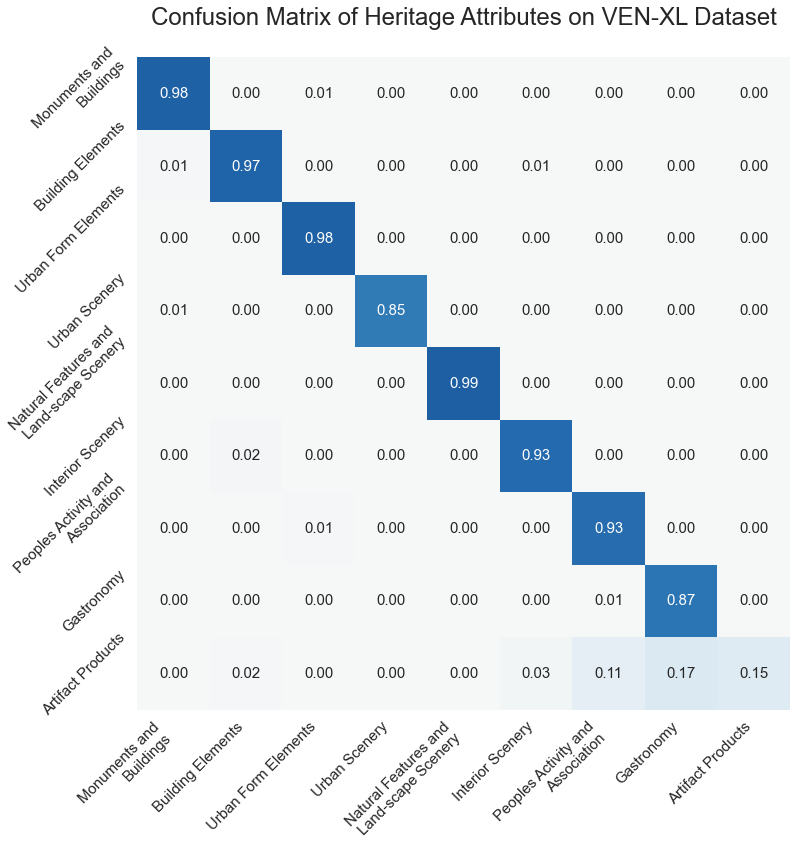

In [340]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(ATT_df_new, annot=True, center=0, annot_kws = {'fontsize':15},
                     vmax=1.2, vmin=0, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=45)
    plt.title('Confusion Matrix of Heritage Attributes on VEN-XL Dataset\n',size=24)
    plt.show()

In [38]:
VAL_df = pd.DataFrame((2*VAL_conf/(VAL_conf.sum(axis=0)+0.0000000001+VAL_conf.sum(axis=1)))[:-1,:-1], 
                      index=classes[:-1], columns=classes[:-1])

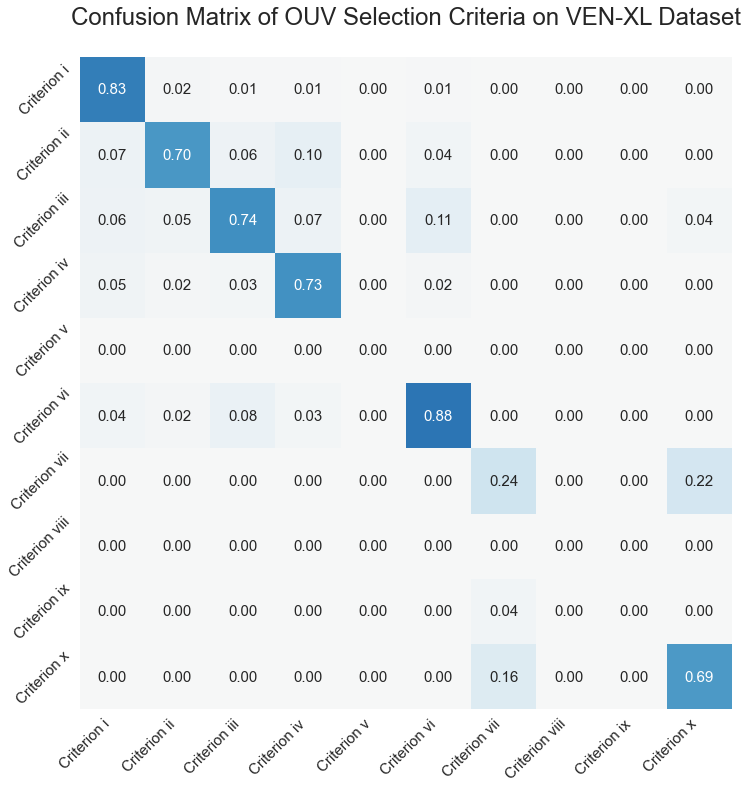

In [39]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(VAL_df, annot=True, center=0, annot_kws = {'fontsize':15},
                     vmax=1.2, vmin=0, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=45)
    plt.title('Confusion Matrix of OUV Selection Criteria on VEN-XL Dataset\n',size=24)
    plt.show()

In [40]:
VAL_df_k = pd.DataFrame((2*VAL_conf_k/(VAL_conf_k.sum(axis=1)+0.0000000001-4*
                                      VAL_conf_k.diagonal()+VAL_conf_k.sum(axis=0)+0.0000000001))[:-1,:-1], 
                        index=classes[:-1], columns=classes[:-1])

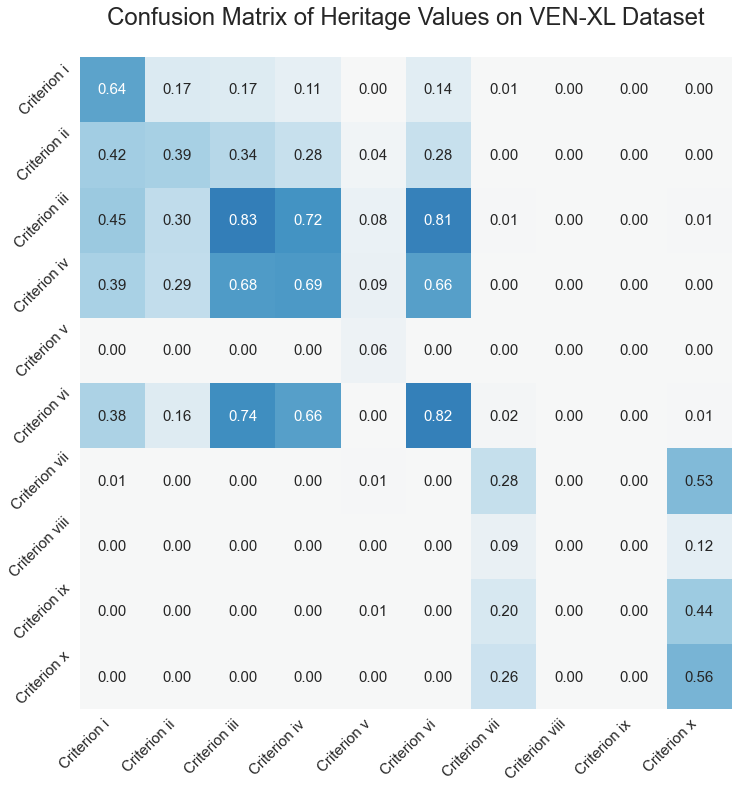

In [41]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(VAL_df_k, annot=True, center=0, annot_kws = {'fontsize':15},
                     vmax=1.2, vmin=0, square=True, fmt='.2f',cmap="RdBu",cbar=False)
    label_x = ax.get_xticklabels()
    label_y = ax.get_yticklabels()
    plt.setp(label_x, horizontalalignment='right', fontsize=15, rotation=45)
    plt.setp(label_y, verticalalignment='center', fontsize=15, rotation=45)
    plt.title('Confusion Matrix of Heritage Values on VEN-XL Dataset\n',size=24)
    plt.show()

### Statistical Tests of Confidence and Agreement Values

In [97]:
results['Split'] = pd.Series(split_masks['train']*1 + split_masks['val']*2 + split_masks['test']*3).fillna(0)

In [98]:
results['Split']

0        2
1        2
2        0
3        0
4        1
        ..
80958    3
80959    3
80960    2
80961    0
80962    2
Name: Split, Length: 80963, dtype: int64

In [99]:
results

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,Confidence,Agreement,Split
0,0.537724,0.072497,0.023566,0.037800,0.011643,0.239657,0.028061,0.023010,0.026043,0.225410,...,0.025080,0.069138,0.005065,0.004105,0.003443,0.004174,0.009989,0.702721,0.553973,2
1,0.266822,0.017705,0.001483,0.006402,0.002683,0.688358,0.003694,0.002522,0.010332,0.201570,...,0.020980,0.083225,0.002840,0.002714,0.002272,0.002595,0.008858,0.804932,0.692497,2
2,0.013112,0.284023,0.014802,0.012405,0.463999,0.020587,0.113919,0.011397,0.065757,0.083799,...,0.028259,0.437207,0.031026,0.016339,0.012229,0.017151,0.016630,0.665210,0.519971,0
3,0.025554,0.272558,0.031688,0.021360,0.063268,0.132266,0.367078,0.028610,0.057617,0.046096,...,0.059767,0.259919,0.019228,0.011341,0.013703,0.013224,0.015740,0.559387,0.383159,0
4,0.006616,0.909048,0.006113,0.002524,0.002362,0.051826,0.009289,0.002223,0.009999,0.026473,...,0.101382,0.090424,0.006236,0.003555,0.005438,0.006320,0.010417,0.829402,0.775994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80958,0.063393,0.252998,0.011522,0.012524,0.011825,0.514142,0.037315,0.009290,0.086992,0.111516,...,0.015232,0.102113,0.003600,0.003777,0.003618,0.003685,0.010313,0.679981,0.555320,3
80959,0.930688,0.015330,0.001392,0.025953,0.006745,0.007861,0.005936,0.004718,0.001378,0.222278,...,0.008915,0.087776,0.002579,0.003693,0.002650,0.002715,0.009001,0.816770,0.771911,3
80960,0.827661,0.044392,0.002604,0.045729,0.007355,0.048676,0.011862,0.008082,0.003639,0.287133,...,0.005977,0.154269,0.003332,0.003863,0.002434,0.002748,0.009790,0.746888,0.724135,2
80961,0.608399,0.196407,0.012783,0.039235,0.010137,0.027618,0.078385,0.021311,0.005724,0.168558,...,0.010497,0.132461,0.003136,0.003483,0.003042,0.003166,0.009745,0.644930,0.592894,0


In [347]:
results.to_csv(save_dir + 'General_Results/preds_XL.csv',sep='\t')

In [101]:
import pingouin as pg

In [350]:
results['Confidence'].describe(),results_L['Confidence'].describe()

(count    80963.000000
 mean         0.638480
 std          0.102168
 min          0.322416
 25%          0.564210
 50%          0.640114
 75%          0.714964
 max          0.913102
 Name: Confidence, dtype: float64,
 count    2951.000000
 mean        0.644182
 std         0.104647
 min         0.369051
 25%         0.571996
 50%         0.643612
 75%         0.721971
 max         0.927020
 Name: Confidence, dtype: float64)

In [421]:
results.groupby(by='Split')['Confidence','Agreement'].mean(), results.groupby(by='Split')['Confidence','Agreement'].std()

/var/folders/fk/23jr2lyj359dv21srl0c___dt88f70/T/ipykernel_86009/1685833854.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results.groupby(by='Split')['Confidence','Agreement'].mean(), results.groupby(by='Split')['Confidence','Agreement'].std()
/var/folders/fk/23jr2lyj359dv21srl0c___dt88f70/T/ipykernel_86009/1685833854.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results.groupby(by='Split')['Confidence','Agreement'].mean(), results.groupby(by='Split')['Confidence','Agreement'].std()


(       Confidence  Agreement
 Split                       
 0        0.563215   0.426772
 1        0.744235   0.663541
 2        0.663101   0.589313
 3        0.663694   0.589334,
        Confidence  Agreement
 Split                       
 0        0.083034   0.129277
 1        0.075879   0.098786
 2        0.079689   0.115499
 3        0.079900   0.115608)

In [422]:
results_L.groupby(by='Split')['Confidence','Agreement'].mean(), results_L.groupby(by='Split')['Confidence','Agreement'].std()

/var/folders/fk/23jr2lyj359dv21srl0c___dt88f70/T/ipykernel_86009/3845799752.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results_L.groupby(by='Split')['Confidence','Agreement'].mean(), results_L.groupby(by='Split')['Confidence','Agreement'].std()
/var/folders/fk/23jr2lyj359dv21srl0c___dt88f70/T/ipykernel_86009/3845799752.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  results_L.groupby(by='Split')['Confidence','Agreement'].mean(), results_L.groupby(by='Split')['Confidence','Agreement'].std()


(       Confidence  Agreement
 Split                       
 0        0.572799   0.444152
 1        0.794727   0.740813
 2        0.665927   0.603517
 3        0.667492   0.604022,
        Confidence  Agreement
 Split                       
 0        0.084058   0.129250
 1        0.041893   0.032818
 2        0.076306   0.110300
 3        0.077404   0.110590)

In [417]:
results.groupby(by='Split')['Confidence'].mean()

Split
0    0.563215
1    0.744235
2    0.663101
3    0.663694
Name: Confidence, dtype: float64

In [353]:
results['Agreement'].describe(),results_L['Agreement'].describe()

(count    80963.000000
 mean         0.540757
 std          0.148690
 min          0.010223
 25%          0.438502
 50%          0.554917
 75%          0.663145
 max          0.815450
 Name: Agreement, dtype: float64,
 count    2951.000000
 mean        0.555627
 std         0.151671
 min         0.123508
 25%         0.452342
 50%         0.572696
 75%         0.684543
 max         0.818802
 Name: Agreement, dtype: float64)

In [409]:
results_L['Dataset'] = 0
results['Dataset'] = 1

In [410]:
compare = pd.concat([results_L, results])
compare

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,Confidence,Agreement,Split,Dataset
0,0.023308,0.092600,0.013124,0.008048,0.196725,0.106169,0.049425,0.006630,0.503971,0.073991,...,0.110538,0.003947,0.002881,0.003196,0.003373,0.008975,0.640173,0.511985,3,0
1,0.007802,0.028861,0.005184,0.002837,0.035748,0.039839,0.007949,0.002255,0.869525,0.137170,...,0.096044,0.004870,0.003663,0.003719,0.004303,0.009441,0.804773,0.758477,1,0
2,0.046474,0.078024,0.019920,0.013998,0.189559,0.294794,0.076289,0.013048,0.267894,0.152243,...,0.131497,0.004096,0.003283,0.002871,0.003469,0.009972,0.541068,0.398835,3,0
3,0.039600,0.167872,0.037128,0.013169,0.010623,0.062525,0.611162,0.047346,0.010575,0.056670,...,0.621870,0.009843,0.006424,0.004495,0.007312,0.009619,0.779347,0.699834,2,0
4,0.224977,0.389542,0.008062,0.058410,0.010918,0.248220,0.037936,0.010347,0.011587,0.188741,...,0.359828,0.005026,0.003659,0.002521,0.003093,0.009433,0.613210,0.462161,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80958,0.063393,0.252998,0.011522,0.012524,0.011825,0.514142,0.037315,0.009290,0.086992,0.111516,...,0.102113,0.003600,0.003777,0.003618,0.003685,0.010313,0.679981,0.555320,3,1
80959,0.930688,0.015330,0.001392,0.025953,0.006745,0.007861,0.005936,0.004718,0.001378,0.222278,...,0.087776,0.002579,0.003693,0.002650,0.002715,0.009001,0.816770,0.771911,3,1
80960,0.827661,0.044392,0.002604,0.045729,0.007355,0.048676,0.011862,0.008082,0.003639,0.287133,...,0.154269,0.003332,0.003863,0.002434,0.002748,0.009790,0.746888,0.724135,2,1
80961,0.608399,0.196407,0.012783,0.039235,0.010137,0.027618,0.078385,0.021311,0.005724,0.168558,...,0.132461,0.003136,0.003483,0.003042,0.003166,0.009745,0.644930,0.592894,0,1


In [411]:
pg.anova(compare, dv='Confidence', between=['Split','Dataset'])

,Source,SS,DF,MS,F,p-unc,np2
0,Split,335.506410,3.0,111.835470,17336.251175,0.000000e+00,0.382657
1,Dataset,0.386661,1.0,0.386661,59.938493,9.895631e-15,0.000714
2,Split * Dataset,0.626806,3.0,0.208935,32.388235,6.501435e-21,0.001157
3,Residual,541.274283,83906.0,0.006451,NaN,NaN,NaN


In [413]:
pg.anova(compare, dv='Confidence', between=['Split','Dataset'],effsize='n2')

,Source,SS,DF,MS,F,p-unc,n2
0,Split,335.506410,3.0,111.835470,17336.251175,0.000000e+00,0.382215
1,Dataset,0.386661,1.0,0.386661,59.938493,9.895631e-15,0.000440
2,Split * Dataset,0.626806,3.0,0.208935,32.388235,6.501435e-21,0.000714
3,Residual,541.274283,83906.0,0.006451,NaN,NaN,NaN


In [415]:
pg.anova(compare, dv='Agreement', between=['Split','Dataset'],effsize='n2')

,Source,SS,DF,MS,F,p-unc,n2
0,Split,680.844958,3.0,226.948319,16195.095263,0.000000e+00,0.366169
1,Dataset,1.553444,1.0,1.553444,110.854206,6.610266e-26,0.000835
2,Split * Dataset,1.165498,3.0,0.388499,27.723420,6.540272e-18,0.000627
3,Residual,1175.808192,83906.0,0.014013,NaN,NaN,NaN


In [427]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_tukey(data=compare, dv='Confidence', between='Split',
                            effsize='cohen')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.5f')


POST HOC TESTS

      A        B    mean(A)    mean(B)      diff       se           T    p-tukey     cohen
-------  -------  ---------  ---------  --------  -------  ----------  ---------  --------
0.00000  1.00000    0.56359    0.74576  -0.18217  0.00087  -210.01508    0.00000  -2.26607
0.00000  2.00000    0.56359    0.66320  -0.09961  0.00072  -137.65510    0.00000  -1.23901
0.00000  3.00000    0.56359    0.66382  -0.10023  0.00072  -138.52064    0.00000  -1.24680
1.00000  2.00000    0.74576    0.66320   0.08257  0.00092    89.31512    0.00000   1.02706
1.00000  3.00000    0.74576    0.66382   0.08194  0.00092    88.63763    0.00000   1.01927
2.00000  3.00000    0.66320    0.66382  -0.00063  0.00079    -0.79174    0.85824  -0.00779



In [428]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_tukey(data=compare, dv='Agreement', between='Split',
                            effsize='cohen')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.5f')


POST HOC TESTS

      A        B    mean(A)    mean(B)      diff       se           T    p-tukey     cohen
-------  -------  ---------  ---------  --------  -------  ----------  ---------  --------
0.00000  1.00000    0.42745    0.66588  -0.23843  0.00128  -186.45334    0.00000  -2.01184
0.00000  2.00000    0.42745    0.58979  -0.16234  0.00107  -152.18689    0.00000  -1.36981
0.00000  3.00000    0.42745    0.58983  -0.16238  0.00107  -152.22174    0.00000  -1.37012
1.00000  2.00000    0.66588    0.58979   0.07609  0.00136    55.83220    0.00000   0.64203
1.00000  3.00000    0.66588    0.58983   0.07605  0.00136    55.80492    0.00000   0.64172
2.00000  3.00000    0.58979    0.58983  -0.00004  0.00117    -0.03189    0.99999  -0.00031



In [356]:
pg.ttest(results['Confidence'],results_L['Confidence'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.909623,3158.40181,two-sided,0.003644,"[-0.01, -0.0]",0.055758,1.448,0.844995


In [357]:
pg.ttest(results['Agreement'],results_L['Agreement'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.235052,3160.154157,two-sided,1.757225e-07,"[-0.02, -0.01]",0.099937,1.849e+04,0.999628


In [102]:
pg.homoscedasticity(data=results, dv='Confidence', group='Split')

,W,pval,equal_var
levene,84.862317,8.123863e-55,False


In [103]:
aov = pg.anova(data=results, dv='Confidence', between='Split', detailed=True)
print(aov)

   Source          SS     DF          MS             F  p-unc      np2
0   Split  321.130572      3  107.043524  16539.323035    0.0  0.37999
1  Within  523.971667  80959    0.006472           NaN    NaN      NaN


In [104]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_tukey(data=results, dv='Confidence', between='Split',
                            effsize='hedges')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.3f')


POST HOC TESTS

    A      B    mean(A)    mean(B)    diff     se         T    p-tukey    hedges
-----  -----  ---------  ---------  ------  -----  --------  ---------  --------
0.000  1.000      0.563      0.744  -0.181  0.001  -205.091      0.000    -2.250
0.000  2.000      0.563      0.663  -0.100  0.001  -135.447      0.000    -1.242
0.000  3.000      0.563      0.664  -0.100  0.001  -136.251      0.000    -1.249
1.000  2.000      0.744      0.663   0.081  0.001    86.309      0.000     1.008
1.000  3.000      0.744      0.664   0.081  0.001    85.678      0.000     1.001
2.000  3.000      0.663      0.664  -0.001  0.001    -0.737      0.882    -0.007



In [105]:
pg.homoscedasticity(data=results, dv='Agreement', group='Split')

,W,pval,equal_var
levene,530.681493,0.0,False


In [106]:
aov = pg.anova(data=results, dv='Agreement', between='Split', detailed=True)
print(aov)

   Source           SS     DF          MS             F  p-unc       np2
0   Split   651.496746      3  217.165582  15443.243428    0.0  0.363974
1  Within  1138.459576  80959    0.014062           NaN    NaN       NaN


In [107]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_tukey(data=results, dv='Agreement', between='Split',
                            effsize='hedges')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.3f')


POST HOC TESTS

    A      B    mean(A)    mean(B)    diff     se         T    p-tukey    hedges
-----  -----  ---------  ---------  ------  -----  --------  ---------  --------
0.000  1.000      0.427      0.664  -0.237  0.001  -181.988      0.000    -1.997
0.000  2.000      0.427      0.589  -0.163  0.001  -149.529      0.000    -1.371
0.000  3.000      0.427      0.589  -0.163  0.001  -149.548      0.000    -1.371
1.000  2.000      0.664      0.589   0.074  0.001    53.570      0.000     0.626
1.000  3.000      0.664      0.589   0.074  0.001    53.555      0.000     0.626
2.000  3.000      0.589      0.589  -0.000  0.001    -0.018      1.000    -0.000



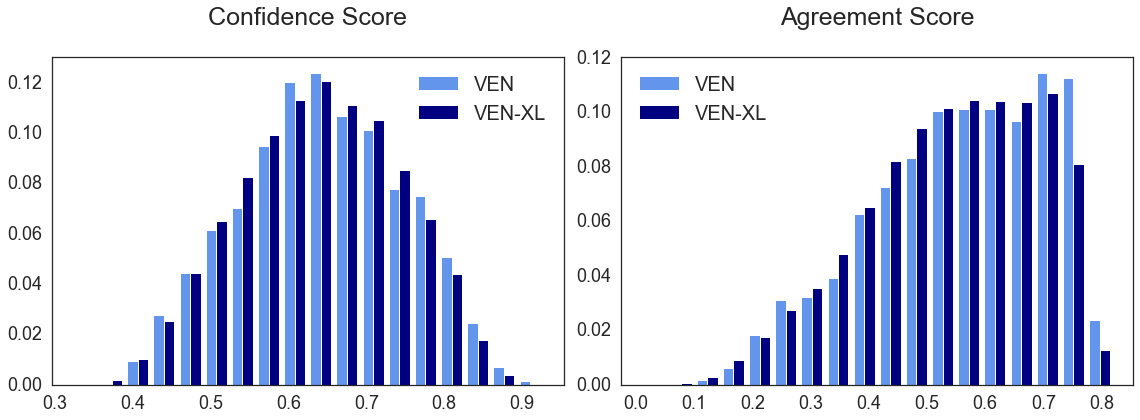

In [406]:
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

n_bins=18

labels = ['VEN', 'VEN-XL']
colors = ['cornflowerblue', 'navy']

ax0.hist([np.array(results_L['Confidence']), np.array(results['Confidence'])], 
         n_bins, density=False, weights=[np.ones(len(results_L)) / len(results_L),
                                         np.ones(len(results)) / len(results)], histtype='bar', 
         label=labels, color=colors)
ax0.legend(prop={'size': 20},frameon=False)
ax0.set_title('Confidence Score\n',size=25)
label_x = ax0.get_xticklabels()
label_y = ax0.get_yticklabels()
plt.setp(label_x, horizontalalignment='center', fontsize=18)
plt.setp(label_y, verticalalignment='center', fontsize=18)
    

ax1.hist([np.array(results_L['Agreement']), np.array(results['Agreement'])], 
         n_bins, density=False, weights=[np.ones(len(results_L)) / len(results_L),
                                         np.ones(len(results)) / len(results)], histtype='bar', label=labels, 
         color=colors)
ax1.legend(prop={'size': 20},frameon=False)
ax1.set_title('Agreement Score\n',size=25)
label_x = ax1.get_xticklabels()
label_y = ax1.get_yticklabels()
plt.setp(label_x, horizontalalignment='center', fontsize=18)
plt.setp(label_y, verticalalignment='center', fontsize=18)

fig.tight_layout()
plt.show()

## Computation of Attention Values

In [108]:
Y = torch.tensor(np.array(results)[:,:-3]).T

In [109]:
Y.sum(dim=1)

tensor([10021.4419, 18160.7000,  3660.8264,  4944.3842, 10699.1529,  9946.4058,
        17619.5186,  3717.2366,  2193.3337, 11388.1040, 10412.4063, 17503.8854,
        12737.5968,  2409.2379, 19144.3548,  1922.4750,  1321.1386,  1086.6247,
         1640.5545,  1396.6221], dtype=torch.float64)

In [110]:
conf = torch.tensor(results['Confidence'])
agr = torch.tensor(results['Agreement'])

In [111]:
conf

tensor([0.7027, 0.8049, 0.6652,  ..., 0.7469, 0.6449, 0.6993],
       dtype=torch.float64)

In [112]:
k=2
S = (torch.exp(Y * torch.pow(conf,1.0/k) * torch.pow(agr,1.0/k))*1000)/((torch.exp(Y * torch.pow(conf,1.0/k) * torch.pow(agr,1.0/k)).sum(dim=1)).unsqueeze(1))

In [113]:
pd.Series(torch.hstack([S[i,:] for i in range(20)])).describe()

count    1.619260e+06
mean     1.235132e-02
std      1.198806e-03
min      1.060199e-02
25%      1.195605e-02
50%      1.226293e-02
75%      1.241410e-02
max      2.693855e-02
dtype: float64

<AxesSubplot: >

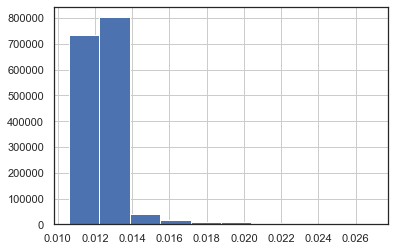

In [114]:
pd.Series(torch.hstack([S[i,:] for i in range(20)])).hist()

<AxesSubplot: >

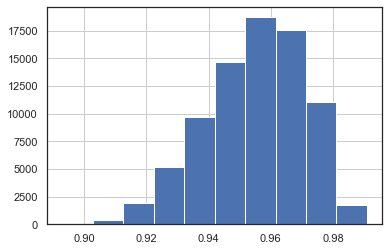

In [115]:
pd.Series(torch.pow(conf,0.1)).hist()

<AxesSubplot: >

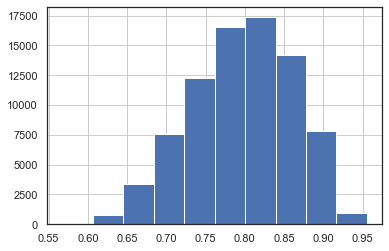

In [116]:
pd.Series(torch.pow(conf,0.5)).hist()

<AxesSubplot: >

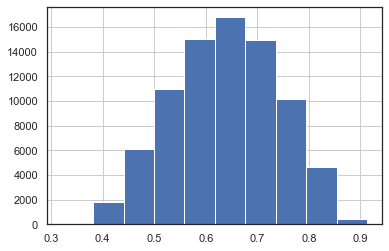

In [117]:
pd.Series(torch.pow(conf,1)).hist()

## Spatial Merging

### Importing Spatial Matrix

In [6]:
import networkx as nx

In [4]:
GEO_metadata = pd.read_csv('dataset/GEO_dataset/VEN-XL/GEO_metadata.csv', sep='\t', index_col='Unnamed: 0')

/var/folders/fk/23jr2lyj359dv21srl0c___dt88f70/T/ipykernel_33993/3230242930.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  GEO_metadata = pd.read_csv('dataset/GEO_dataset/VEN-XL/GEO_metadata.csv', sep='\t', index_col='Unnamed: 0')


In [5]:
GEO_metadata['GEO_node']

0          49973409
1          49981281
2        5128847037
3        4370729275
4        1840378053
            ...    
80958    5244439847
80959    5244439847
80960    5244439847
80961    5244439847
80962    5244439847
Name: GEO_node, Length: 80963, dtype: int64

In [6]:
len(GEO_metadata['GEO_node'].unique())

3571

In [7]:
GEO_nodes = GEO_metadata['GEO_node'].unique()

In [8]:
GEO_dict = {GEO_nodes[i]:i for i in range(len(GEO_nodes))}

In [9]:
GEO_node_dist = pd.read_csv('dataset/GEO_dataset/VEN-XL/GEO_node_dist.csv', sep='\t', index_col='Unnamed: 0')

In [37]:
GEO_node_dist_s.shape

(3571, 3571)

In [10]:
GEO_node_dist_s = GEO_node_dist[GEO_nodes.astype(str)].loc[GEO_nodes]

In [11]:
GEO_node_dist_sym = (np.array(GEO_node_dist_s) + np.array(GEO_node_dist_s).T)/2

In [12]:
W =  torch.tensor(abs(20 - GEO_node_dist_sym)/20 * ((GEO_node_dist_sym<20).astype(float)))

/var/folders/fk/23jr2lyj359dv21srl0c___dt88f70/T/ipykernel_33993/1081403.py:1: RuntimeWarning: invalid value encountered in multiply
  W =  torch.tensor(abs(20 - GEO_node_dist_sym)/20 * ((GEO_node_dist_sym<20).astype(float)))


In [13]:
((GEO_node_dist_sym).astype(float)).sum()

inf

In [14]:
W = torch.nan_to_num(W,0)

In [15]:
W.shape

torch.Size([3571, 3571])

In [16]:
W.sum()

tensor(89589.7500, dtype=torch.float64)

In [17]:
D = torch.diag(1/(W.sum(dim=0)))

In [18]:
D

tensor([[0.0288, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0282, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0136,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0418, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0282, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0656]],
       dtype=torch.float64)

In [19]:
D.sum()

tensor(239.1419, dtype=torch.float64)

In [20]:
mapping = torch.tensor(GEO_metadata['GEO_node'].apply(lambda x: GEO_dict[x]))

In [21]:
mapping

tensor([   0,    1,    2,  ..., 3567, 3567, 3567])

In [22]:
B = F.one_hot(mapping).double()

In [23]:
B.shape

torch.Size([80963, 3571])

### Computing Initial Labels for the Spatial Nodes

In [156]:
Y_0 = ((S*Y)@B)/(S@B)

In [157]:
Y_00 = torch.vstack([Y_0[:9,:]/(Y_0[:9,:].sum(dim=0)), Y_0[9:,:]/(Y_0[9:,:].sum(dim=0))])

In [158]:
Y

tensor([[0.5377, 0.2668, 0.0131,  ..., 0.8277, 0.6084, 0.6989],
        [0.0725, 0.0177, 0.2840,  ..., 0.0444, 0.1964, 0.0833],
        [0.0236, 0.0015, 0.0148,  ..., 0.0026, 0.0128, 0.0056],
        ...,
        [0.0034, 0.0023, 0.0122,  ..., 0.0024, 0.0030, 0.0039],
        [0.0042, 0.0026, 0.0172,  ..., 0.0027, 0.0032, 0.0035],
        [0.0100, 0.0089, 0.0166,  ..., 0.0098, 0.0097, 0.0106]],
       dtype=torch.float64)

In [159]:
Y_00.shape

torch.Size([20, 3571])

In [160]:
Y_00.sum(dim=0)

tensor([2.0000, 2.0000, 2.0000,  ..., 2.0000, 2.0000, 2.0000],
       dtype=torch.float64)

In [532]:
Y_00.sum(dim=1)

tensor([134.3601, 280.8075,  36.9616,  43.3592,  89.6926, 154.5140, 140.9645,
         26.8317,  27.5088, 161.3504, 150.3999, 181.6146, 167.9210,  29.4203,
        165.8296,  20.1003,  14.0174,  11.3000,  17.6889,  15.3576],
       dtype=torch.float64)

In [165]:
Y_00.sum()

tensor(7142., dtype=torch.float64)

In [166]:
Y.sum()

tensor(161926.0000, dtype=torch.float64)

<AxesSubplot: >

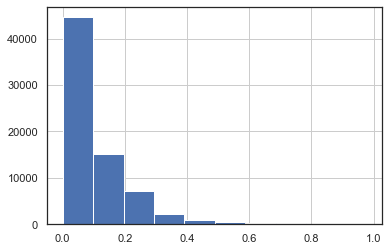

In [167]:
pd.Series(torch.hstack([Y_00[i,:] for i in range(20)])).hist()

<AxesSubplot: >

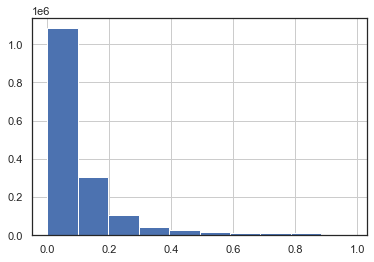

In [168]:
pd.Series(torch.hstack([Y[i,:] for i in range(20)])).hist()

<AxesSubplot: >

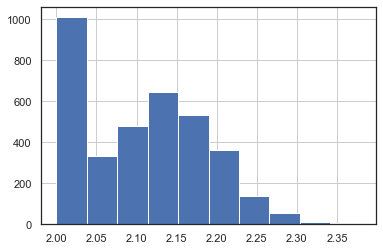

In [169]:
pd.Series(Y_0.sum(dim=0)).hist()

In [170]:
Y_00

tensor([[0.4009, 0.1249, 0.0909,  ..., 0.1720, 0.0237, 0.0122],
        [0.1772, 0.0125, 0.2027,  ..., 0.3375, 0.8691, 0.6904],
        [0.0211, 0.1042, 0.0227,  ..., 0.0360, 0.0062, 0.0498],
        ...,
        [0.0037, 0.0025, 0.0133,  ..., 0.0038, 0.0194, 0.0166],
        [0.0041, 0.0035, 0.0182,  ..., 0.0041, 0.0271, 0.0272],
        [0.0104, 0.0090, 0.0171,  ..., 0.0115, 0.0207, 0.0206]],
       dtype=torch.float64)

In [171]:
Y_1 = 0.9*Y_00 + 0.1 * Y_00@(W@D)

In [172]:
Y_1

tensor([[0.3737, 0.1258, 0.0922,  ..., 0.1696, 0.0366, 0.0266],
        [0.1891, 0.0406, 0.2131,  ..., 0.3415, 0.8197, 0.6601],
        [0.0250, 0.0996, 0.0252,  ..., 0.0387, 0.0110, 0.0495],
        ...,
        [0.0042, 0.0031, 0.0132,  ..., 0.0046, 0.0188, 0.0163],
        [0.0051, 0.0045, 0.0182,  ..., 0.0056, 0.0263, 0.0265],
        [0.0108, 0.0095, 0.0170,  ..., 0.0121, 0.0204, 0.0203]],
       dtype=torch.float64)

In [173]:
W@D

tensor([[0.0288, 0.0242, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0248, 0.0282, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0136,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0418, 0.0199, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0294, 0.0282, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0656]],
       dtype=torch.float64)

In [174]:
alpha_max = 1/torch.lobpcg(W@D)[0]

In [175]:
alpha_max

tensor([1.0001], dtype=torch.float64)

In [176]:
alpha = 0

In [177]:
Y_n = torch.linalg.solve((torch.eye(len(GEO_nodes)).double() - alpha * W @ D), (1-alpha)*Y_00.T, out=None).T

In [178]:
Y_n

tensor([[0.4009, 0.1249, 0.0909,  ..., 0.1720, 0.0237, 0.0122],
        [0.1772, 0.0125, 0.2027,  ..., 0.3375, 0.8691, 0.6904],
        [0.0211, 0.1042, 0.0227,  ..., 0.0360, 0.0062, 0.0498],
        ...,
        [0.0037, 0.0025, 0.0133,  ..., 0.0038, 0.0194, 0.0166],
        [0.0041, 0.0035, 0.0182,  ..., 0.0041, 0.0271, 0.0272],
        [0.0104, 0.0090, 0.0171,  ..., 0.0115, 0.0207, 0.0206]],
       dtype=torch.float64)

In [179]:
pd.Series(Y_n.sum(dim=0)).describe()

count    3.571000e+03
mean     2.000000e+00
std      2.655501e-16
min      2.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      2.000000e+00
dtype: float64

<AxesSubplot: >

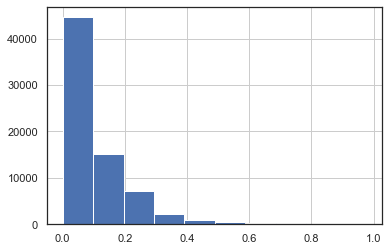

In [180]:
pd.Series(torch.hstack([Y_n[i,:] for i in range(20)])).hist()

In [181]:
pd.Series(torch.hstack([Y_n[i,:] for i in range(20)])).describe()

count    71420.000000
mean         0.100000
std          0.123149
min          0.000298
25%          0.017198
50%          0.040158
75%          0.155653
max          0.978945
dtype: float64

In [182]:
alpha = 0.1

In [183]:
Y_n = torch.linalg.solve((torch.eye(len(GEO_nodes)).double() - alpha * W @ D), (1-alpha)*Y_00.T, out=None).T

In [184]:
Y_n

tensor([[0.3740, 0.1271, 0.0949,  ..., 0.1668, 0.0409, 0.0258],
        [0.1885, 0.0422, 0.2232,  ..., 0.3337, 0.8276, 0.6573],
        [0.0241, 0.0989, 0.0266,  ..., 0.0371, 0.0118, 0.0492],
        ...,
        [0.0042, 0.0032, 0.0135,  ..., 0.0044, 0.0191, 0.0163],
        [0.0050, 0.0045, 0.0187,  ..., 0.0053, 0.0268, 0.0264],
        [0.0107, 0.0096, 0.0175,  ..., 0.0118, 0.0208, 0.0202]],
       dtype=torch.float64)

<AxesSubplot: >

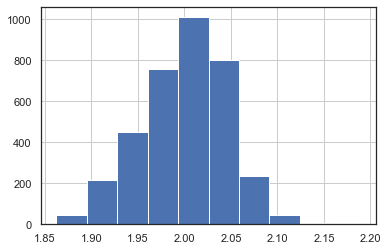

In [185]:
pd.Series(Y_n.sum(dim=0)).hist()

In [186]:
pd.Series(Y_n.sum(dim=0)).describe()

count    3571.000000
mean        2.000000
std         0.045870
min         1.862417
25%         1.970789
50%         2.002674
75%         2.032588
max         2.189591
dtype: float64

<AxesSubplot: >

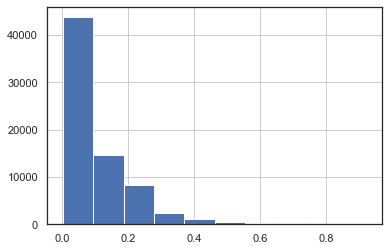

In [187]:
pd.Series(torch.hstack([Y_n[i,:] for i in range(20)])).hist()

In [188]:
pd.Series(torch.hstack([Y_n[i,:] for i in range(20)])).describe()

count    71420.000000
mean         0.100000
std          0.118349
min          0.002362
25%          0.018372
50%          0.042110
75%          0.156274
max          0.924614
dtype: float64

In [189]:
alpha = 0.9

In [190]:
Y_n = torch.linalg.solve((torch.eye(len(GEO_nodes)).double() - alpha * W @ D), (1-alpha)*Y_00.T, out=None).T

In [191]:
Y_n

tensor([[0.1565, 0.1358, 0.1810,  ..., 0.1313, 0.1796, 0.1280],
        [0.2812, 0.2769, 0.5060,  ..., 0.2923, 0.4757, 0.3801],
        [0.0426, 0.0519, 0.0874,  ..., 0.0411, 0.0541, 0.0431],
        ...,
        [0.0095, 0.0098, 0.0181,  ..., 0.0097, 0.0161, 0.0128],
        [0.0138, 0.0144, 0.0272,  ..., 0.0144, 0.0240, 0.0189],
        [0.0144, 0.0149, 0.0253,  ..., 0.0136, 0.0209, 0.0162]],
       dtype=torch.float64)

<AxesSubplot: >

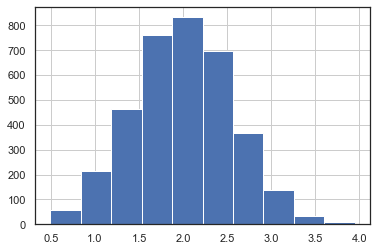

In [192]:
pd.Series(Y_n.sum(dim=0)).hist()

In [193]:
pd.Series(Y_n.sum(dim=0)).describe()

count    3571.000000
mean        2.000000
std         0.560050
min         0.495165
25%         1.615533
50%         2.002295
75%         2.384043
max         3.947416
dtype: float64

<AxesSubplot: >

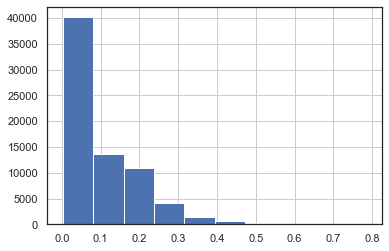

In [194]:
pd.Series(torch.hstack([Y_n[i,:] for i in range(20)])).hist()

In [195]:
pd.Series(torch.hstack([Y_n[i,:] for i in range(20)])).describe()

count    71420.000000
mean         0.100000
std          0.099438
min          0.002414
25%          0.022318
50%          0.055183
75%          0.158335
max          0.786377
dtype: float64

In [196]:
Y_n[:,0]

tensor([0.1565, 0.2812, 0.0426, 0.0569, 0.0405, 0.1614, 0.1646, 0.0382, 0.0264,
        0.1529, 0.1412, 0.2041, 0.1690, 0.0256, 0.2101, 0.0164, 0.0114, 0.0095,
        0.0138, 0.0144], dtype=torch.float64)

In [197]:
alpha = 0.99

In [198]:
Y_n = torch.linalg.solve((torch.eye(len(GEO_nodes)).double() - alpha * W @ D), (1-alpha)*Y_00.T, out=None).T

In [199]:
Y_n

tensor([[0.1528, 0.1545, 0.2924,  ..., 0.1195, 0.1765, 0.1042],
        [0.3473, 0.3551, 0.7209,  ..., 0.2729, 0.4101, 0.2647],
        [0.0501, 0.0521, 0.1084,  ..., 0.0382, 0.0558, 0.0332],
        ...,
        [0.0125, 0.0128, 0.0255,  ..., 0.0097, 0.0146, 0.0092],
        [0.0185, 0.0190, 0.0381,  ..., 0.0145, 0.0218, 0.0137],
        [0.0173, 0.0178, 0.0350,  ..., 0.0131, 0.0196, 0.0120]],
       dtype=torch.float64)

<AxesSubplot: >

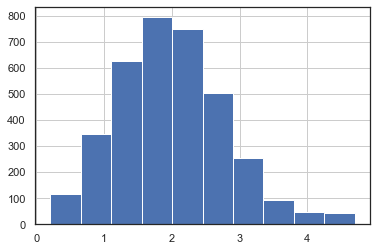

In [200]:
pd.Series(Y_n.sum(dim=0)).hist()

In [201]:
pd.Series(Y_n.sum(dim=0)).describe()

count    3571.000000
mean        2.000000
std         0.790780
min         0.210886
25%         1.440626
50%         1.969625
75%         2.487407
max         4.699939
dtype: float64

<AxesSubplot: >

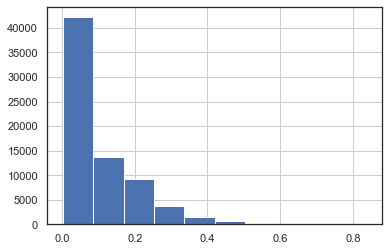

In [202]:
pd.Series(torch.hstack([Y_n[i,:] for i in range(20)])).hist()

In [203]:
pd.Series(torch.hstack([Y_n[i,:] for i in range(20)])).describe()

count    71420.000000
mean         0.100000
std          0.104377
min          0.001553
25%          0.022260
50%          0.055368
75%          0.153680
max          0.838990
dtype: float64

In [204]:
Y_n[:,0]

tensor([0.1528, 0.3473, 0.0501, 0.0580, 0.0561, 0.1621, 0.1864, 0.0404, 0.0259,
        0.1634, 0.1469, 0.2338, 0.1777, 0.0316, 0.2404, 0.0218, 0.0150, 0.0125,
        0.0185, 0.0173], dtype=torch.float64)

In [205]:
spatial_y = {}
for a in list(range(0,100,10))+[99]:
    alpha = a/100
    spatial_y[alpha] = torch.linalg.solve((torch.eye(len(GEO_nodes)).double() - alpha * W @ D), 
                                          (1-alpha)*Y_00.T, out=None).T

In [206]:
spatial_vs = pd.DataFrame([pd.Series(torch.hstack([spatial_y[j][i,:] for i in range(20)])).describe() for j in spatial_y])
spatial_vs['alpha'] = pd.Series([j for j in spatial_y])
spatial_vs

,count,mean,std,min,25%,50%,75%,max,alpha
0,71420.0,0.1,0.123149,0.000298,0.017198,0.040158,0.155653,0.978945,0.00
1,71420.0,0.1,0.118349,0.002362,0.018372,0.042110,0.156274,0.924614,0.10
2,71420.0,0.1,0.113906,0.002559,0.019171,0.044888,0.156967,0.898847,0.20
3,71420.0,0.1,0.109877,0.002754,0.019853,0.046874,0.157929,0.896514,0.30
4,71420.0,0.1,0.106325,0.002944,0.020474,0.048601,0.158550,0.893379,0.40
5,71420.0,0.1,0.103326,0.003126,0.020983,0.049997,0.158786,0.888954,0.50
6,71420.0,0.1,0.100968,0.003298,0.021403,0.051346,0.159038,0.882265,0.60
7,71420.0,0.1,0.099365,0.003157,0.021760,0.052620,0.158959,0.871067,0.70
8,71420.0,0.1,0.098703,0.002815,0.022009,0.053846,0.158912,0.848848,0.80
9,71420.0,0.1,0.099438,0.002414,0.022318,0.055183,0.158335,0.786377,0.90


In [207]:
spatial_y_np = {v:np.array(spatial_y[v]) for v in spatial_y}

In [ ]:
import pickle

with open(save_dir + 'General_Results/spatial_values_XL.p', 'wb') as handle:
    pickle.dump(spatial_y_np, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [52]:
import pickle

with open(save_dir + 'General_Results/spatial_values_XL.p', 'rb') as handle:
    spatial_y_np = pickle.load(handle)
    
spatial_y_np

{0.0: array([[0.40086229, 0.12487969, 0.09094271, ..., 0.17202344, 0.02365646,
         0.01222347],
        [0.17718684, 0.01245792, 0.20269191, ..., 0.33747429, 0.86906492,
         0.69035733],
        [0.02109434, 0.10421113, 0.02271322, ..., 0.03601839, 0.00622581,
         0.04983055],
        ...,
        [0.00369382, 0.00248642, 0.01328532, ..., 0.00377327, 0.01943904,
         0.0165797 ],
        [0.00414468, 0.00350212, 0.01823655, ..., 0.00407889, 0.02711219,
         0.0271848 ],
        [0.01039138, 0.0090109 , 0.01709673, ..., 0.01150478, 0.02073366,
         0.02059459]]),
 0.1: array([[0.37398235, 0.12705129, 0.09491675, ..., 0.16684161, 0.04091785,
         0.02577222],
        [0.18852689, 0.04218172, 0.22318367, ..., 0.33369098, 0.8275754 ,
         0.65733725],
        [0.0240644 , 0.09892733, 0.02663924, ..., 0.03710369, 0.01175763,
         0.0492476 ],
        ...,
        [0.0042001 , 0.00317058, 0.01351324, ..., 0.00444467, 0.01911982,
         0.01625346],
  

## Spatial AutoCorrelation

In [33]:
import esda
import pandas as pd
#import geopandas as gpd
#from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
#from shapely.geometry import Point
%matplotlib inline

/Users/nbai/opt/miniconda3/lib/python3.9/site-packages/libpysal/weights/util.py:23: UserWarning: geopandas not available. Some functionality will be disabled.
  warn("geopandas not available. Some functionality will be disabled.")


In [34]:
y = pd.Series(spatial_y_np[0.3][0])

In [35]:
Ws = W

In [44]:
W

tensor([[1.0000, 0.8600, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.8600, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.7050, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.7050, 1.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000]],
       dtype=torch.float64)

In [46]:
(W.sum(axis=0)==1).sum()

tensor(27)

In [36]:
ids_W = Ws.nonzero()
ids_W

tensor([[   0,    0],
        [   0,    1],
        [   0,   12],
        ...,
        [3570, 3556],
        [3570, 3566],
        [3570, 3570]])

In [37]:
neighbours = {}
weights = {}
for a in ids_W:
    s = a[0].item()
    t = a[1].item()
    if not s in neighbours:
        neighbours[s] = [t]
        weights[s] = [W[s,t].item()]
    else:
        neighbours[s].append(t)
        weights[s].append(W[s,t].item())

In [38]:
W[W.nonzero(as_tuple=True)]

tensor([1.0000, 0.8600, 0.2250,  ..., 0.7150, 0.4550, 1.0000],
       dtype=torch.float64)

In [39]:
from libpysal.weights import W
w = W(neighbours, weights)

/Users/nbai/opt/miniconda3/lib/python3.9/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 35 disconnected components.
  warnings.warn(message)


In [40]:
"%.3f"%w.pct_nonzero

'1.911'

In [41]:
w.n

3571

In [42]:
w[0]

{0: 1.0,
 1: 0.86,
 12: 0.225,
 15: 0.7150000000000001,
 26: 0.18000000000000008,
 40: 0.1400000000000002,
 49: 0.25,
 50: 0.20999999999999996,
 107: 0.4200000000000001,
 108: 0.36500000000000005,
 109: 0.39,
 117: 0.3049999999999999,
 155: 0.18000000000000008,
 214: 0.32999999999999996,
 247: 0.615,
 250: 0.38,
 260: 0.030000000000000072,
 275: 0.22999999999999998,
 306: 0.33500000000000013,
 330: 0.20999999999999996,
 331: 0.25999999999999995,
 423: 0.6,
 452: 0.14000000000000004,
 461: 0.25,
 467: 0.1,
 468: 0.09000000000000004,
 491: 0.32999999999999996,
 492: 0.05500000000000007,
 507: 0.16499999999999987,
 576: 0.34,
 593: 0.13500000000000015,
 594: 0.039999999999999855,
 605: 0.33499999999999996,
 640: 0.45999999999999996,
 659: 0.6,
 687: 0.005000000000000071,
 704: 0.255,
 705: 0.06999999999999992,
 1398: 0.015000000000000036,
 1598: 0.15500000000000008,
 1599: 0.14499999999999993,
 1600: 0.3,
 1601: 0.13499999999999995,
 1603: 0.38499999999999995,
 1604: 0.495,
 1605: 0.10500

In [43]:
mi = esda.moran.Moran(y, w, 'd', permutations=9999)
mi.I

0.15096467994793658

In [44]:
from esda.moran import Moran_Local
lm = Moran_Local(y, w, transformation = "d", permutations = 9999)

/Users/nbai/opt/miniconda3/lib/python3.9/site-packages/esda/moran.py:1057: RuntimeWarning: divide by zero encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


In [45]:
(lm.p_z_sim<.025/20).sum()

685

In [46]:
(lm.p_z_sim<(1-np.power(1-.025,1/985))).sum()

323

In [47]:
sig = lm.p_z_sim < 1-np.power(1-.025,1/20)
hotspot = sig * lm.q==1
coldspot = sig * lm.q==3
doughnut = sig * lm.q==2
diamond = sig * lm.q==4

In [48]:
hotspot.sum(), coldspot.sum(), doughnut.sum(), diamond.sum()

(267, 220, 190, 10)

Text(0.5, 0, "Moran's I")

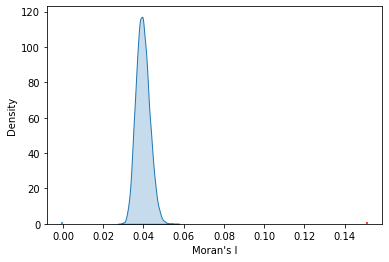

In [49]:
import seaborn as sbn
sbn.kdeplot(mi.sim, fill=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [50]:
(mi.I, mi.EI_sim, mi.seI_sim, mi.p_sim, mi.p_z_sim)

(0.15096467994793658, 0.039576961872241946, 0.0033666929517084136, 0.0001, 0.0)

In [51]:
Ws

tensor([[1.0000, 0.8600, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.8600, 1.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.7050, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.7050, 1.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000]],
       dtype=torch.float64)

In [52]:
len(Ws) * torch.tensor(y-y.mean()).unsqueeze(0) @ Ws @ torch.tensor(y-y.mean()).unsqueeze(0).T / (Ws.sum()*
                            (torch.tensor(y-y.mean()).unsqueeze(0)) @ torch.tensor(y-y.mean()).unsqueeze(0).T)

tensor([[0.1510]], dtype=torch.float64)

In [53]:
mIs = {}
for i in range(20):
    mIs[i] = {}
    for j in spatial_y_np:
        y = pd.Series(spatial_y_np[j][i])
        mi = esda.moran.Moran(y, w, 'D', permutations=9999)
        mIs[i][j] = (mi.I, mi.EI_sim, mi.seI_sim, mi.p_sim)

In [54]:
import pickle

with open(save_dir + 'General_Results/moran_I_D_XL.p', 'wb') as handle:
    pickle.dump(mIs, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
import pickle

with open(save_dir + 'General_Results/moran_I_D_XL.p', 'rb') as handle:
    mIs = pickle.load(handle)

In [8]:
Is = {a:{b:c[0] for b,c in mIs[a].items()} for a in mIs}

In [9]:
SimIs = {a:{b:c[1] for b,c in mIs[a].items()} for a in mIs}
SimSDIs = {a:{b:c[2] for b,c in mIs[a].items()} for a in mIs}
ps = {a:{b:c[-1] for b,c in mIs[a].items()} for a in mIs}

In [10]:
Is_df = pd.DataFrame(Is)
ps_df = pd.DataFrame(ps)
sim_I_df = pd.DataFrame(SimIs)
sim_sd_df = pd.DataFrame(SimSDIs)
Is_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0.00,0.094483,0.113063,0.102962,0.082267,0.221092,0.129528,0.087940,0.086401,0.084822,0.149896,0.158998,0.092001,0.061024,0.074208,0.224732,0.105436,0.099381,0.099397,0.089528,0.071920
0.10,0.108666,0.130463,0.117160,0.093785,0.240805,0.147801,0.099538,0.097971,0.096105,0.177944,0.186527,0.103288,0.071034,0.083306,0.254638,0.118763,0.111361,0.111730,0.100985,0.080719
0.20,0.126938,0.152722,0.135518,0.108648,0.263126,0.171130,0.114451,0.112872,0.110884,0.214697,0.221415,0.120422,0.088295,0.095898,0.289254,0.135727,0.126760,0.127551,0.115684,0.094630
0.30,0.150965,0.181504,0.159929,0.128301,0.288255,0.201507,0.134050,0.132511,0.130822,0.262757,0.264866,0.145039,0.116023,0.113666,0.327584,0.157607,0.146858,0.148122,0.134897,0.116213
0.40,0.183216,0.218908,0.193476,0.155011,0.316189,0.241833,0.160385,0.159021,0.158625,0.324469,0.317015,0.177307,0.156203,0.138857,0.367000,0.186030,0.173291,0.175022,0.160421,0.147939
0.50,0.227261,0.267197,0.241354,0.192372,0.346464,0.296203,0.196419,0.195579,0.198792,0.400189,0.375820,0.215392,0.207294,0.173860,0.403164,0.222718,0.207744,0.209814,0.194607,0.190516
0.60,0.287729,0.327860,0.312523,0.245987,0.377677,0.369789,0.245993,0.246564,0.258676,0.485439,0.436793,0.257306,0.264560,0.220010,0.431529,0.268579,0.250982,0.253064,0.239875,0.241697
0.70,0.368541,0.399725,0.421997,0.323486,0.406570,0.466995,0.312492,0.316554,0.348794,0.569613,0.495663,0.304310,0.325156,0.276597,0.450759,0.321936,0.301493,0.302942,0.296894,0.298702
0.80,0.466071,0.478203,0.589538,0.429407,0.426297,0.585702,0.395226,0.406336,0.476007,0.642696,0.555053,0.364527,0.394927,0.344307,0.467192,0.378336,0.357290,0.356828,0.361619,0.364913
0.90,0.563472,0.567022,0.810616,0.545248,0.422620,0.715603,0.495045,0.513981,0.615284,0.715443,0.637161,0.465381,0.501504,0.443028,0.505634,0.443780,0.432122,0.427259,0.432645,0.464438


In [11]:
sim_I_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0.00,0.039549,0.039629,0.039617,0.039624,0.039584,0.039583,0.039606,0.039581,0.039551,0.039579,0.039541,0.039585,0.039570,0.039658,0.039644,0.039592,0.039659,0.039635,0.039583,0.039583
0.10,0.039623,0.039536,0.039588,0.039595,0.039543,0.039539,0.039616,0.039636,0.039559,0.039598,0.039589,0.039612,0.039632,0.039588,0.039608,0.039564,0.039596,0.039474,0.039606,0.039592
0.20,0.039608,0.039622,0.039640,0.039564,0.039568,0.039619,0.039554,0.039578,0.039565,0.039570,0.039587,0.039664,0.039585,0.039599,0.039610,0.039557,0.039581,0.039592,0.039614,0.039606
0.30,0.039570,0.039588,0.039577,0.039585,0.039623,0.039668,0.039621,0.039510,0.039631,0.039573,0.039577,0.039540,0.039597,0.039588,0.039634,0.039622,0.039548,0.039644,0.039659,0.039553
0.40,0.039592,0.039650,0.039603,0.039685,0.039612,0.039590,0.039598,0.039616,0.039570,0.039522,0.039575,0.039587,0.039549,0.039537,0.039560,0.039590,0.039662,0.039574,0.039576,0.039592
0.50,0.039617,0.039580,0.039546,0.039630,0.039561,0.039637,0.039551,0.039567,0.039538,0.039475,0.039586,0.039593,0.039612,0.039636,0.039517,0.039600,0.039579,0.039570,0.039587,0.039649
0.60,0.039620,0.039622,0.039568,0.039633,0.039552,0.039602,0.039573,0.039590,0.039625,0.039559,0.039542,0.039614,0.039593,0.039640,0.039630,0.039539,0.039563,0.039573,0.039617,0.039606
0.70,0.039613,0.039639,0.039578,0.039672,0.039581,0.039569,0.039619,0.039611,0.039606,0.039533,0.039608,0.039539,0.039573,0.039631,0.039611,0.039567,0.039616,0.039538,0.039580,0.039584
0.80,0.039587,0.039571,0.039580,0.039567,0.039603,0.039596,0.039488,0.039606,0.039614,0.039609,0.039609,0.039605,0.039612,0.039604,0.039578,0.039577,0.039588,0.039568,0.039581,0.039590
0.90,0.039588,0.039592,0.039626,0.039498,0.039590,0.039626,0.039578,0.039603,0.039586,0.039591,0.039560,0.039578,0.039544,0.039627,0.039540,0.039575,0.039647,0.039510,0.039591,0.039617


In [12]:
ps_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0.00,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
0.10,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
0.20,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
0.30,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
0.40,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
0.50,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
0.60,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
0.70,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
0.80,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
0.90,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001


In [48]:
np.array(sim_I_df).mean(), np.array(sim_I_df).std()

(0.03958975406392852, 3.618263027133878e-05)

In [49]:
np.array(sim_sd_df).mean(), np.array(sim_sd_df).std()

(0.003344293283232806, 3.14563027075098e-05)

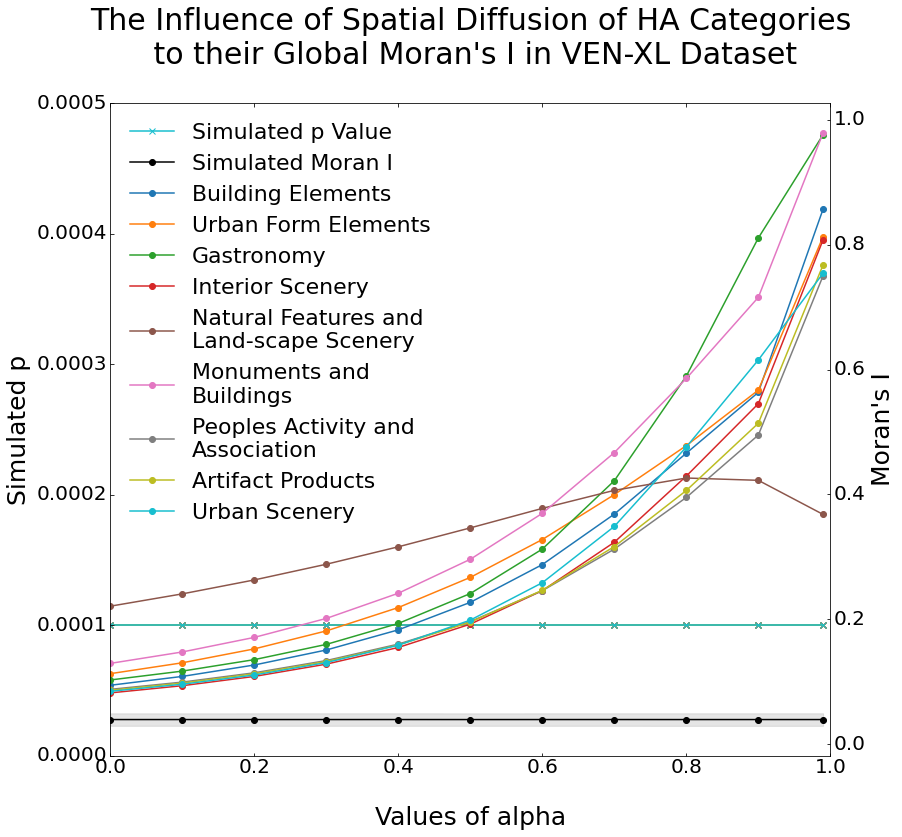

In [13]:
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=[16,12])
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

c = np.arange(1, 10)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.tab10)
cmap.set_array([])

par1 = host.twinx()

par1.axis["right"].toggle(all=True)
p2, = par1.plot(sim_I_df.iloc[:,:9].mean(axis=1), marker='o', c='k', label='Simulated Moran I')

for i in range(9):
    p2, = par1.plot(Is_df[i], label=categories[i], c=cmap.to_rgba(i+1), marker='o')
    if not i==8:
        p1, = host.plot(ps_df[i+9], c=cmap.to_rgba(i+1),marker='x')
    else:
        p1, = host.plot(ps_df[i+9], c=cmap.to_rgba(i+1),marker='x',label='Simulated p Value')
    
    
par1.fill_between(np.array(Is_df.index), np.array(sim_I_df.iloc[:,:9].mean(axis=1)-3*sim_sd_df.iloc[:,:9].mean(axis=1)), 
                        np.array(sim_I_df.iloc[:,:9].mean(axis=1)+3*sim_sd_df.iloc[:,:9].mean(axis=1)), color='k', alpha=.1)

host.set_xlim(0, 1)
host.set_ylim(0, .0005)
#par1.set_ylim(0, 1.2)

host.set_xlabel("\nValues of alpha")
host.axis["bottom"].label.set_fontsize(25)
par1.set_ylabel("Moran's I")
par1.axis["right"].label.set_fontsize(25)
host.set_ylabel("Simulated p")
host.axis["left"].label.set_fontsize(25)

host.axis["bottom"].major_ticklabels.set_fontsize(20)
par1.axis["right"].major_ticklabels.set_fontsize(20)
host.axis["left"].major_ticklabels.set_fontsize(20)

host.legend(frameon=False, fontsize=22)

host.set_title("The Influence of Spatial Diffusion of HA Categories\n to their Global Moran's I in VEN-XL Dataset\n", size=30)

#host.axis["left"].label.set_color(p1.get_color())
#par1.axis["right"].label.set_color(p2.get_color())

plt.show()

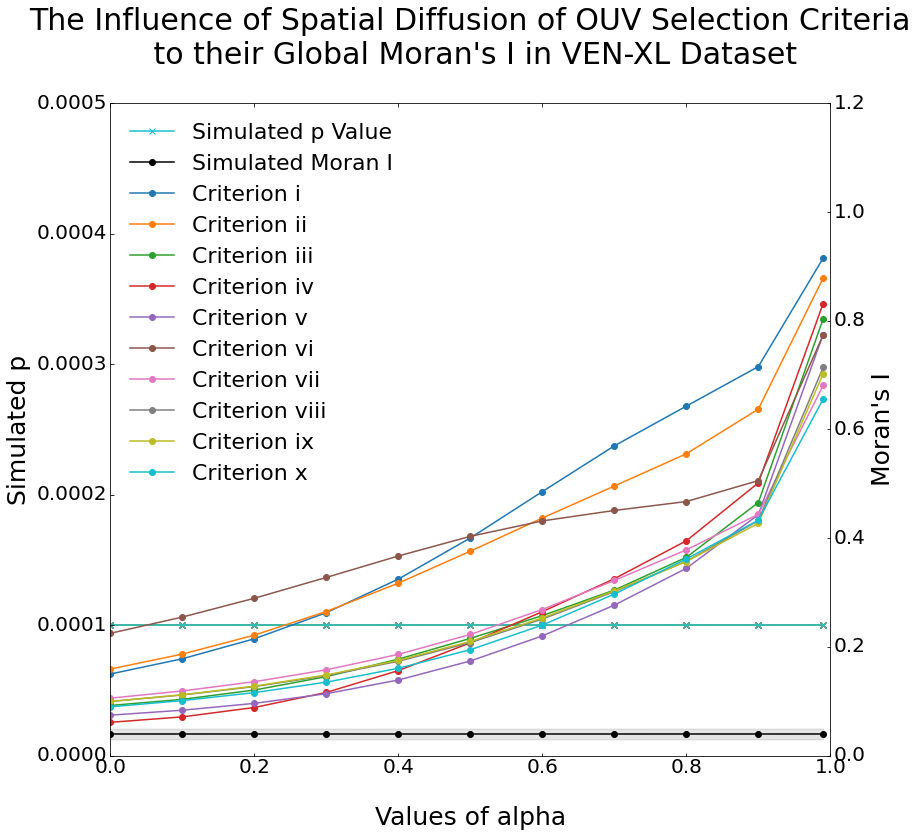

In [14]:
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=[16,12])
host = host_subplot(111, axes_class=axisartist.Axes)
plt.subplots_adjust(right=0.75)

c = np.arange(1, 11)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.tab10)
cmap.set_array([])

par1 = host.twinx()

par1.axis["right"].toggle(all=True)

p2, = par1.plot(sim_I_df.iloc[:,9:].mean(axis=1), marker='o', c='k', label='Simulated Moran I')


for i in range(10):
    p2, = par1.plot(Is_df[i+9], label=classes[i], c=cmap.to_rgba(i+1), marker='o')
    if not i==9:
        p1, = host.plot(ps_df[i+9], c=cmap.to_rgba(i+1),marker='x')
    else:
        p1, = host.plot(ps_df[i+9], c=cmap.to_rgba(i+1),marker='x',label='Simulated p Value')
    
    
par1.fill_between(np.array(Is_df.index), np.array(sim_I_df.iloc[:,9:].mean(axis=1)-3*sim_sd_df.iloc[:,9:].mean(axis=1)), 
                        np.array(sim_I_df.iloc[:,9:].mean(axis=1)+3*sim_sd_df.iloc[:,9:].mean(axis=1)), color='k', alpha=.1)

host.set_xlim(0, 1)
host.set_ylim(0, .0005)
par1.set_ylim(0, 1.2)

host.set_xlabel("\nValues of alpha")
host.axis["bottom"].label.set_fontsize(25)
par1.set_ylabel("Moran's I")
par1.axis["right"].label.set_fontsize(25)
host.set_ylabel("Simulated p")
host.axis["left"].label.set_fontsize(25)

host.axis["bottom"].major_ticklabels.set_fontsize(20)
par1.axis["right"].major_ticklabels.set_fontsize(20)
host.axis["left"].major_ticklabels.set_fontsize(20)

host.legend(frameon=False, fontsize=22)

host.set_title("The Influence of Spatial Diffusion of OUV Selection Criteria\n to their Global Moran's I in VEN-XL Dataset\n", size=30)

#host.axis["left"].label.set_color(p1.get_color())
#par1.axis["right"].label.set_color(p2.get_color())

plt.show()

In [53]:
y_loc = pd.DataFrame(spatial_y_np[0.3])
y_loc

,0,1,2,3,4,5,6,7,8,9,...,3561,3562,3563,3564,3565,3566,3567,3568,3569,3570
0,0.319736,0.130567,0.104332,0.119201,0.051116,0.097953,0.091345,0.078875,0.085279,0.067012,...,0.252568,0.058888,0.065708,0.400529,0.054906,0.074226,0.249247,0.156547,0.075347,0.052663
1,0.210522,0.100743,0.267222,0.235427,0.252123,0.324822,0.337018,0.417995,0.389520,0.234349,...,0.287608,0.692973,0.711953,0.220154,0.225881,0.449477,0.422721,0.325445,0.743397,0.591515
2,0.029531,0.087954,0.035760,0.035106,0.034627,0.033448,0.045630,0.020736,0.021464,0.068462,...,0.042333,0.025959,0.021525,0.017062,0.013934,0.021873,0.024369,0.039087,0.022792,0.048144
3,0.053302,0.026611,0.028552,0.023924,0.017311,0.014567,0.027840,0.050243,0.032837,0.023568,...,0.044337,0.023333,0.028101,0.025585,0.008393,0.019518,0.025699,0.081020,0.020772,0.017389
4,0.023972,0.010307,0.114004,0.108334,0.133616,0.013504,0.182224,0.040409,0.020313,0.088174,...,0.016355,0.018918,0.018049,0.038538,0.013494,0.048591,0.018536,0.035328,0.016095,0.009108
5,0.213948,0.307139,0.225218,0.169120,0.118666,0.313957,0.194955,0.345445,0.296672,0.180003,...,0.094021,0.092672,0.069463,0.118257,0.440787,0.200554,0.116100,0.111842,0.101779,0.062982
6,0.077200,0.295507,0.249262,0.172845,0.213233,0.130904,0.151104,0.122856,0.172867,0.186404,...,0.130337,0.055474,0.067134,0.069422,0.028753,0.082864,0.061757,0.129748,0.059781,0.164308
7,0.028633,0.037873,0.026591,0.026897,0.026896,0.019268,0.024634,0.022154,0.023675,0.023681,...,0.029896,0.016632,0.021032,0.016380,0.006914,0.016233,0.015268,0.042227,0.016415,0.026769
8,0.030461,0.011972,0.043597,0.044674,0.041795,0.014118,0.057363,0.025438,0.033186,0.037905,...,0.014095,0.018011,0.011551,0.033019,0.073171,0.032110,0.020542,0.020679,0.015116,0.010754
9,0.207613,0.144483,0.221224,0.172102,0.160094,0.132400,0.215748,0.136086,0.108072,0.146942,...,0.089997,0.207196,0.176414,0.142556,0.162459,0.154312,0.143125,0.187130,0.141851,0.137939


In [87]:
GEO_metadata.groupby('GEO_node').count().loc[GEO_nodes]

,y,x,street_count,pr,bc,dg,cl,highway,geometry,index,...,English,Italian,Other_Lang,num_sent,revised_text,text_data,text_len,posts_num,week_adjust,adjusted_week
GEO_node,,,,,,,,,,,,,,,,,,,,,
49973409,2,2,2,2,2,2,2,0,2,2,...,2,2,2,2,2,2,2,2,2,2
49981281,2,2,2,2,2,2,2,0,2,2,...,2,2,2,2,2,2,2,2,2,2
5128847037,26,26,26,26,26,26,26,0,26,26,...,16,16,16,16,20,26,16,26,26,26
4370729275,42,42,42,42,42,42,42,0,42,42,...,20,20,20,20,28,41,20,42,42,42
1840378053,48,48,48,48,48,48,48,0,48,48,...,26,26,26,26,38,47,26,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298026706,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,1,0,1,1,1
5244439847,16,16,16,16,16,16,16,0,16,16,...,16,16,16,16,16,16,16,16,16,16
1765405927,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1


In [88]:
y_GEO = y_loc.T
y_GEO['id'] = GEO_node_dist_s.index
y_GEO['count'] = GEO_metadata.groupby('GEO_node').count().loc[GEO_nodes]['street_count'].reset_index()['street_count']
y_GEO

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,id,count
0,0.319736,0.210522,0.029531,0.053302,0.023972,0.213948,0.077200,0.028633,0.030461,0.207613,...,0.229297,0.019012,0.123872,0.007984,0.006241,0.005246,0.006853,0.011421,49973409,2
1,0.130567,0.100743,0.087954,0.026611,0.010307,0.307139,0.295507,0.037873,0.011972,0.144483,...,0.305261,0.021872,0.151209,0.007341,0.005406,0.004571,0.006653,0.010739,49981281,2
2,0.104332,0.267222,0.035760,0.028552,0.114004,0.225218,0.249262,0.026591,0.043597,0.221224,...,0.171880,0.031981,0.232421,0.025036,0.017889,0.014024,0.019769,0.018459,5128847037,26
3,0.119201,0.235427,0.035106,0.023924,0.108334,0.169120,0.172845,0.026897,0.044674,0.172102,...,0.149241,0.031659,0.186067,0.027925,0.018426,0.014993,0.021486,0.017575,4370729275,42
4,0.051116,0.252123,0.034627,0.017311,0.133616,0.118666,0.213233,0.026896,0.041795,0.160094,...,0.149598,0.028861,0.167358,0.024146,0.016364,0.013064,0.018186,0.015393,1840378053,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,0.074226,0.449477,0.021873,0.019518,0.048591,0.200554,0.082864,0.016233,0.032110,0.154312,...,0.145649,0.039876,0.164632,0.044976,0.032860,0.025994,0.032739,0.022187,298026706,1
3567,0.249247,0.422721,0.024369,0.025699,0.018536,0.116100,0.061757,0.015268,0.020542,0.143125,...,0.216405,0.023533,0.140932,0.010532,0.007056,0.006212,0.008635,0.011540,5244439847,16
3568,0.156547,0.325445,0.039087,0.081020,0.035328,0.111842,0.129748,0.042227,0.020679,0.187130,...,0.153054,0.015434,0.221154,0.009056,0.007057,0.005783,0.007592,0.012280,1765405927,1
3569,0.075347,0.743397,0.022792,0.020772,0.016095,0.101779,0.059781,0.016415,0.015116,0.141851,...,0.177857,0.044331,0.215965,0.036678,0.026055,0.018460,0.026247,0.020955,27239504,1


In [39]:
y_loc.to_csv(save_dir + 'General_Results/spatial_preds_XL.csv',sep='\t')

In [16]:
y_loc = pd.read_csv(save_dir + 'General_Results/spatial_preds_XL.csv',sep='\t', index_col='Unnamed: 0')

In [89]:
y_GEO.to_csv(save_dir + 'General_Results/spatial_preds_GEO_XL.csv',sep='\t')

<AxesSubplot:>

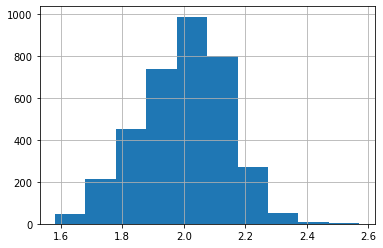

In [54]:
y_loc.sum().hist()

In [73]:
loc_Is = {}
for i in range(20):
    y = pd.Series(y_loc.T[i])
    lm = Moran_Local(y, w, transformation = "d", permutations = 9999)
    loc_Is[i] = (lm.p_z_sim, lm.q, lm.Is)

/Users/nbai/opt/miniconda3/lib/python3.9/site-packages/esda/moran.py:1057: RuntimeWarning: divide by zero encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/Users/nbai/opt/miniconda3/lib/python3.9/site-packages/esda/moran.py:1057: RuntimeWarning: divide by zero encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/Users/nbai/opt/miniconda3/lib/python3.9/site-packages/esda/moran.py:1057: RuntimeWarning: divide by zero encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/Users/nbai/opt/miniconda3/lib/python3.9/site-packages/esda/moran.py:1057: RuntimeWarning: divide by zero encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/Users/nbai/opt/miniconda3/lib/python3.9/site-packages/esda/moran.py:1057: RuntimeWarning: divide by zero encountered in true_divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim
/Users/nbai/opt/miniconda3/lib/python3.9/site-packages/esda/moran

In [74]:
import pickle

with open(save_dir + 'General_Results/local_moran_I_D_XL.p', 'wb') as handle:
    pickle.dump(loc_Is, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
import pickle

with open(save_dir + 'General_Results/local_moran_I_D_XL.p', 'rb') as handle:
    loc_Is = pickle.load(handle)
    
loc_Is[0][0]

array([0.30135201, 0.39854908, 0.00977314, ..., 0.11386042, 0.02077519,
       0.0713089 ])

In [29]:
loc_ps = pd.DataFrame({a:b[0] for a, b in loc_Is.items()})
loc_qs = pd.DataFrame({a:b[1] for a, b in loc_Is.items()})
loc_Is = pd.DataFrame({a:b[2] for a, b in loc_Is.items()})

In [30]:
loc_ps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.301352,0.020356,9.935089e-03,0.092910,0.000097,1.381891e-02,0.002490,3.604540e-07,1.871711e-01,2.405187e-01,8.248715e-02,0.104362,5.797194e-03,0.000043,0.077019,9.834472e-08,7.368781e-10,1.862364e-09,0.000020,1.521667e-07
1,0.398549,0.023108,5.702813e-02,0.056483,0.000085,7.615739e-03,0.028979,1.565652e-05,1.150274e-01,3.687634e-01,1.233290e-01,0.092011,2.497984e-02,0.000041,0.050096,4.848420e-08,4.609786e-10,1.614527e-09,0.000014,7.901145e-08
2,0.009773,0.180810,1.338042e-02,0.019941,0.199571,7.947909e-11,0.159948,3.651661e-01,4.520417e-10,0.000000e+00,5.051515e-14,0.000131,2.791631e-01,0.264590,0.009396,2.699960e-01,4.803662e-01,1.573873e-01,0.107510,4.385888e-02
3,0.005177,0.203045,1.055557e-08,0.005868,0.217196,3.490959e-07,0.289134,1.549453e-01,1.019835e-05,0.000000e+00,3.546950e-06,0.012599,1.686264e-01,0.430814,0.104741,2.935559e-01,2.155727e-01,9.087042e-02,0.262084,5.291976e-02
4,0.002542,0.367038,1.293184e-05,0.011553,0.496530,4.207435e-03,0.248427,9.125158e-02,1.364096e-02,1.879958e-07,1.343612e-02,0.133500,4.355924e-01,0.459759,0.293764,3.548386e-01,1.344221e-01,8.630170e-02,0.378702,2.494285e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,0.136843,0.040043,3.490312e-01,0.455876,0.014959,2.721521e-01,0.139885,2.022464e-01,2.666708e-01,1.968148e-04,6.687598e-04,0.040501,2.387604e-01,0.267079,0.018417,4.313239e-01,1.236744e-01,1.972889e-01,0.472754,1.419923e-01
3567,0.281421,0.012439,2.448816e-03,0.040689,0.012573,4.309681e-02,0.002251,1.233223e-01,2.918424e-01,1.897102e-05,5.983549e-04,0.301938,4.863535e-01,0.082282,0.000941,2.705762e-01,1.422701e-01,1.407088e-01,0.186140,1.741024e-01
3568,0.113860,0.068860,9.739585e-03,0.452668,0.008585,2.581108e-01,0.011865,1.933438e-01,3.430875e-01,4.573290e-01,4.722968e-01,0.308284,3.834365e-06,0.000226,0.093164,4.779115e-01,4.907628e-01,4.056956e-01,0.479952,3.953490e-02
3569,0.020775,0.148106,5.076278e-02,0.438981,0.001939,1.056404e-01,0.026953,2.280251e-01,2.515445e-01,4.878302e-01,3.761363e-01,0.371452,5.340445e-07,0.001496,0.066446,2.507817e-01,2.347521e-01,4.308717e-01,0.366599,9.723801e-02


In [31]:
sig = loc_ps < 1-np.power(1-.025,1/20)
hotspot = sig * loc_qs==1
coldspot = sig * loc_qs==3
doughnut = sig * loc_qs==2
diamond = sig * loc_qs==4

In [32]:
hotspot.sum(), coldspot.sum(), doughnut.sum(), diamond.sum()

(0     273
 1     411
 2     160
 3     205
 4     377
 5     371
 6     217
 7     203
 8     218
 9     516
 10    619
 11    365
 12    288
 13    210
 14    688
 15    275
 16    261
 17    236
 18    152
 19    269
 dtype: int64,
 0     220
 1     248
 2      21
 3      75
 4     890
 5     334
 6     207
 7      95
 8      18
 9     525
 10    381
 11    115
 12     57
 13    114
 14    521
 15    195
 16    210
 17    199
 18    124
 19    110
 dtype: int64,
 0     192
 1     168
 2     183
 3     152
 4      86
 5     187
 6      83
 7      90
 8      94
 9     216
 10    264
 11    154
 12    133
 13    110
 14    141
 15     89
 16     84
 17     87
 18     44
 19    115
 dtype: int64,
 0      10
 1      24
 2       1
 3       8
 4      29
 5      27
 6      40
 7      12
 8       0
 9      44
 10     30
 11     37
 12     12
 13     33
 14    100
 15     33
 16     62
 17     59
 18     27
 19     33
 dtype: int64)

In [41]:
sig.to_csv(save_dir + 'General_Results/significance_GEO_XL.csv',sep='\t')

In [42]:
hotspot.to_csv(save_dir + 'General_Results/hotspot_GEO_XL.csv',sep='\t')

<AxesSubplot: >

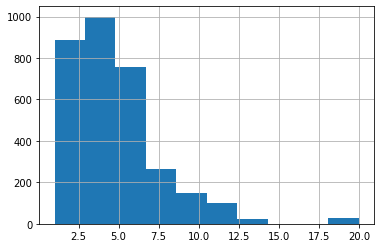

In [80]:
(sig.sum(axis=1)[sig.sum(axis=1)>0]).hist()

In [81]:
hotspot

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3567,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3568,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3569,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [56]:
y_loc.T.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,0.131518,0.340590,0.044824,0.048739,0.072777,0.128316,0.173385,0.036299,0.023552,0.147655,0.134161,0.218081,0.162608,0.030659,0.219146,0.022924,0.015422,0.012903,0.019715,0.016726
std,0.102774,0.170287,0.049280,0.051797,0.098062,0.091053,0.108731,0.026224,0.023075,0.052106,0.037601,0.036137,0.029910,0.009051,0.058188,0.010672,0.005790,0.005064,0.011461,0.003464
min,0.009113,0.011790,0.006559,0.005975,0.004742,0.003528,0.021038,0.004910,0.004292,0.031582,0.037921,0.097470,0.053377,0.007225,0.067979,0.004492,0.003597,0.002754,0.003978,0.008301
25%,0.063557,0.201742,0.022312,0.023124,0.020279,0.064157,0.093298,0.020064,0.013387,0.114723,0.111187,0.195571,0.145102,0.024453,0.179026,0.015951,0.011140,0.009275,0.013563,0.014126
50%,0.099961,0.314099,0.031175,0.031918,0.033926,0.101768,0.147058,0.028561,0.018268,0.139151,0.129028,0.215085,0.160577,0.030301,0.206879,0.021866,0.015140,0.012585,0.018661,0.016626
75%,0.163655,0.454662,0.046456,0.051801,0.075936,0.167205,0.224256,0.044351,0.026650,0.169971,0.150514,0.235122,0.176457,0.036078,0.249797,0.028091,0.019012,0.015948,0.023985,0.019080
max,0.715002,0.829110,0.646431,0.668456,0.896514,0.696641,0.719985,0.434199,0.504931,0.464405,0.346250,0.412617,0.453173,0.097595,0.507612,0.146533,0.056815,0.055954,0.310095,0.028054


In [18]:
y_loc_HA = y_loc.T.iloc[:,0:9].rename(columns = {i:categories[i] for i in range(len(categories))})[categories_new[::-1]]
y_loc_HA

,Artifact Products,Gastronomy,Peoples Activity and\nAssociation,Interior Scenery,Natural Features and\nLand-scape Scenery,Urban Scenery,Urban Form Elements,Building Elements,Monuments and\nBuildings
0,0.028633,0.029531,0.077200,0.053302,0.023972,0.030461,0.210522,0.319736,0.213948
1,0.037873,0.087954,0.295507,0.026611,0.010307,0.011972,0.100743,0.130567,0.307139
2,0.026591,0.035760,0.249262,0.028552,0.114004,0.043597,0.267222,0.104332,0.225218
3,0.026897,0.035106,0.172845,0.023924,0.108334,0.044674,0.235427,0.119201,0.169120
4,0.026896,0.034627,0.213233,0.017311,0.133616,0.041795,0.252123,0.051116,0.118666
...,...,...,...,...,...,...,...,...,...
3566,0.016233,0.021873,0.082864,0.019518,0.048591,0.032110,0.449477,0.074226,0.200554
3567,0.015268,0.024369,0.061757,0.025699,0.018536,0.020542,0.422721,0.249247,0.116100
3568,0.042227,0.039087,0.129748,0.081020,0.035328,0.020679,0.325445,0.156547,0.111842
3569,0.016415,0.022792,0.059781,0.020772,0.016095,0.015116,0.743397,0.075347,0.101779


In [19]:
y_loc_HV = y_loc.T.iloc[:,9:].rename(columns = {i+9:classes[i] for i in range(len(classes))})[classes[::-1]]
y_loc_HV

,Others,Criterion x,Criterion ix,Criterion viii,Criterion vii,Criterion vi,Criterion v,Criterion iv,Criterion iii,Criterion ii,Criterion i
0,0.011421,0.006853,0.005246,0.006241,0.007984,0.123872,0.019012,0.229297,0.161301,0.208464,0.207613
1,0.010739,0.006653,0.004571,0.005406,0.007341,0.151209,0.021872,0.305261,0.230540,0.120598,0.144483
2,0.018459,0.019769,0.014024,0.017889,0.025036,0.232421,0.031981,0.171880,0.197470,0.144385,0.221224
3,0.017575,0.021486,0.014993,0.018426,0.027925,0.186067,0.031659,0.149241,0.175850,0.120206,0.172102
4,0.015393,0.018186,0.013064,0.016364,0.024146,0.167358,0.028861,0.149598,0.176611,0.119707,0.160094
...,...,...,...,...,...,...,...,...,...,...,...
3566,0.022187,0.032739,0.025994,0.032860,0.044976,0.164632,0.039876,0.145649,0.163772,0.118450,0.154312
3567,0.011540,0.008635,0.006212,0.007056,0.010532,0.140932,0.023533,0.216405,0.197135,0.189136,0.143125
3568,0.012280,0.007592,0.005783,0.007057,0.009056,0.221154,0.015434,0.153054,0.180838,0.142547,0.187130
3569,0.020955,0.026247,0.018460,0.026055,0.036678,0.215965,0.044331,0.177857,0.223822,0.139272,0.141851


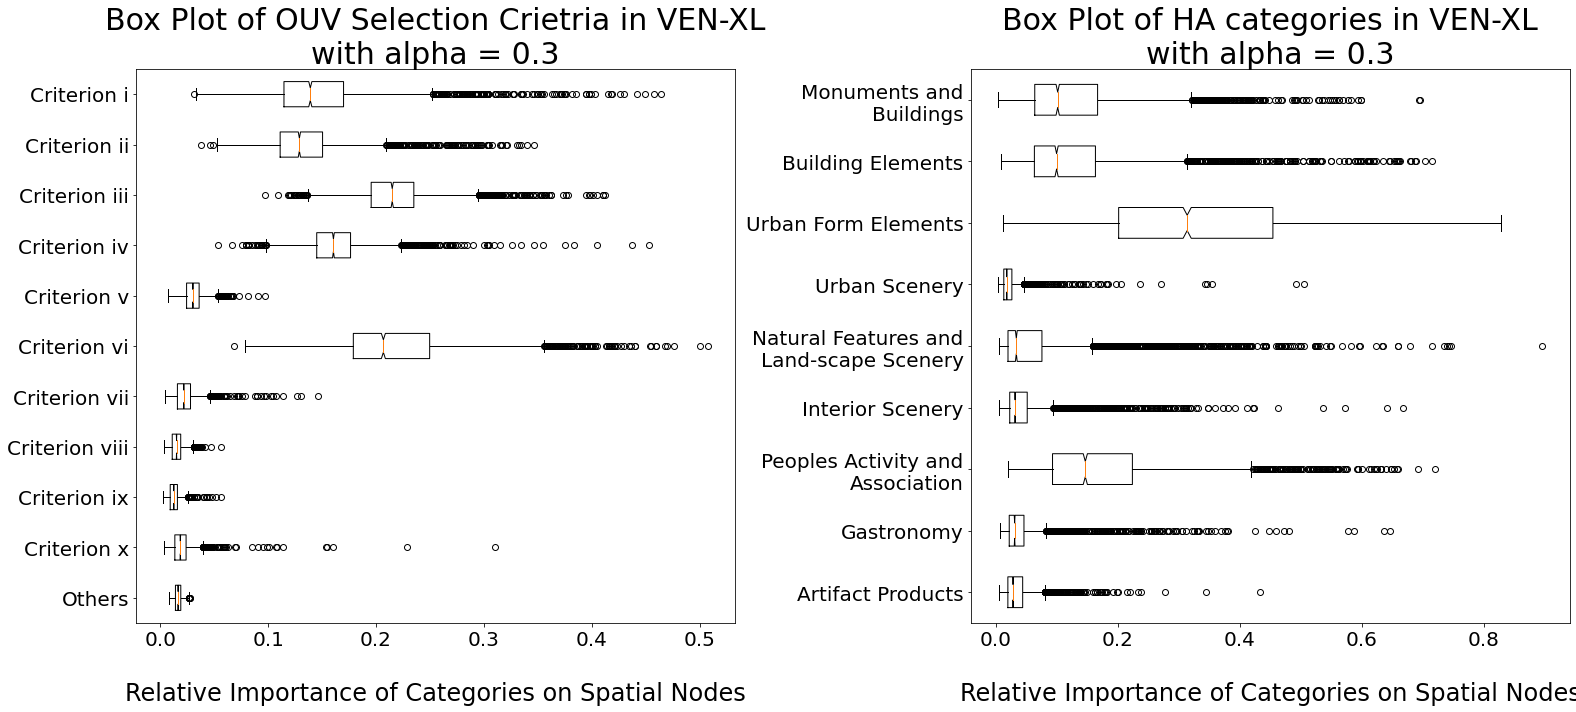

In [21]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(22,10))

# plot violin plot
axs[0].boxplot(y_loc_HV, vert=False, notch=True, labels=classes[::-1])
axs[0].set_title('Box Plot of OUV Selection Crietria in VEN-XL\nwith alpha = 0.3', size=30)

# plot box plot
axs[1].boxplot(y_loc_HA, vert=False, notch=True, labels=categories_new[::-1])
axs[1].set_title('Box Plot of HA categories in VEN-XL\nwith alpha = 0.3', size=30)

# adding horizontal grid lines
for ax in axs:
#    ax.yaxis.grid(True)
#    ax.set_xticks([y + 1 for y in range(len(all_data))],
#                  labels=['x1', 'x2', 'x3', 'x4'])
    ax.set_xlabel('\nRelative Importance of Categories on Spatial Nodes', size=24)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
#    ax.set_ylabel('Observed values')
fig.tight_layout()

plt.show()